# **Price prediction of used cars in Canada**

In [2]:
# Import necessary libraries
# pandas for data manipulation, matplotlib and seaborn for data visualization
# Scikit-learn for machine learning models and preprocessing
# XGBoost for regression and feature importance plotting
# TensorFlow for neural network model creation
# Joblib for saving and loading models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [3]:
# Load the dataset
# Specify the path to the dataset and load it using pandas
file_path = '/content/ca-dealers-used.csv'
df_cars = pd.read_csv(file_path)

# Display the first 10 rows of the dataset
# This helps in understanding the structure and contents of the dataset

print(df_cars.head(10))

<ipython-input-3-27ba0c143b5a>:4: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cars = pd.read_csv(file_path)


              id                vin     price    miles   stock_no    year  \
0  b39ea795-eca9  19UNC1B01HY800062  179999.0   9966.0    V-P4139  2017.0   
1  026cb5b1-6e3e  19UNC1B02HY800023  179995.0   5988.0  PPAP70374  2017.0   
2  5cd5d5b2-5cc2  19UNC1B02HY800071  168528.0  24242.0     B21085  2017.0   
3  b32473ed-5922  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   
4  ac40c9fc-0676  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   
5  0487af07-893c  19UNC1B03HY800063  155771.0  18281.0     U02856  2017.0   
6  b872c7c9-27cd  19UNC1B03HY800063  155771.0  18281.0     U02856  2017.0   
7  87d61ee5-d1c9  19UNC1B03HY800063  155771.0  18281.0     U02856  2017.0   
8  e39410c3-ef41  19UNC1B03HY800080  169998.0  17207.0    UC6386A  2017.0   
9  19549afd-1a64  19UNC1B04LY800016  205000.0    579.0     200404  2020.0   

    make model  trim body_type  ... drivetrain transmission  \
0  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
1  Acura   NSX  Base     C

# Data Understanding

In [4]:
# Display the total number of elements in the DataFrame
# This gives an idea of the dataset's size (rows x columns)
df_cars.size


8265663

In [5]:
# Display the shape of the DataFrame (rows and columns)
# Helps understand the dimensionality of the dataset
df_cars.shape

(393603, 21)

In [6]:
# Identifying the types of attributes in the dataset
attribute_types = df_cars.dtypes
attribute_types

,0
id,object
vin,object
price,float64
miles,float64
stock_no,object
year,float64
make,object
model,object
trim,object
body_type,object


In [7]:
# Identify numerical attributes
numerical_attributes = df_cars.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Attributes:\n", numerical_attributes)

# Identify categorical attributes
categorical_attributes = df_cars.select_dtypes(include=['object']).columns
print("Categorical Attributes:\n", categorical_attributes)

# Identify time attributes by checking for datetime data type after conversion
time_attributes = df_cars.select_dtypes(include=['datetime']).columns
print("Time Attributes:\n", time_attributes)

Numerical Attributes:
 Index(['price', 'miles', 'year', 'engine_size'], dtype='object')
Categorical Attributes:
 Index(['id', 'vin', 'stock_no', 'make', 'model', 'trim', 'body_type',
       'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
       'engine_block', 'seller_name', 'street', 'city', 'state', 'zip'],
      dtype='object')
Time Attributes:
 Index([], dtype='object')


In [8]:
# Check the unique values for each attribute
unique_values = {col: df_cars[col].nunique() for col in df_cars.columns}

# Display the results
print("Unique values in each attributes")
for column, unique_count in unique_values.items():
       print(f"{column}: {unique_count} ")


Unique values in each attributes
id: 393603 
vin: 226691 
price: 27979 
miles: 111859 
stock_no: 191482 
year: 42 
make: 57 
model: 955 
trim: 1607 
body_type: 21 
vehicle_type: 2 
drivetrain: 3 
transmission: 2 
fuel_type: 26 
engine_size: 66 
engine_block: 3 
seller_name: 5160 
street: 4959 
city: 777 
state: 16 
zip: 3620 


In [9]:
# Check statistical details for numerical attributes
numerical_stats = df_cars.describe()
# Display the results
print("Statistical Details for Numerical Attributes:")
print(numerical_stats)


Statistical Details for Numerical Attributes:
              price         miles           year    engine_size
count  3.584860e+05  3.665900e+05  393586.000000  320950.000000
mean   2.601902e+04  7.566339e+04    2016.414829       2.785073
std    2.064007e+04  5.775442e+04       3.345400       1.236639
min    0.000000e+00  0.000000e+00    1981.000000       0.600000
25%    1.490000e+04  3.491375e+04    2015.000000       2.000000
50%    2.190000e+04  6.232800e+04    2017.000000       2.400000
75%    3.199500e+04  1.032830e+05    2019.000000       3.500000
max    1.288888e+06  2.300033e+06    2022.000000       8.400000


Visualizations of raw data

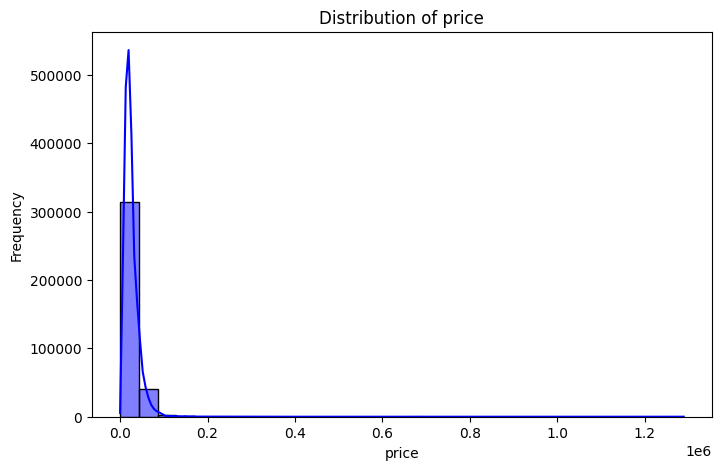

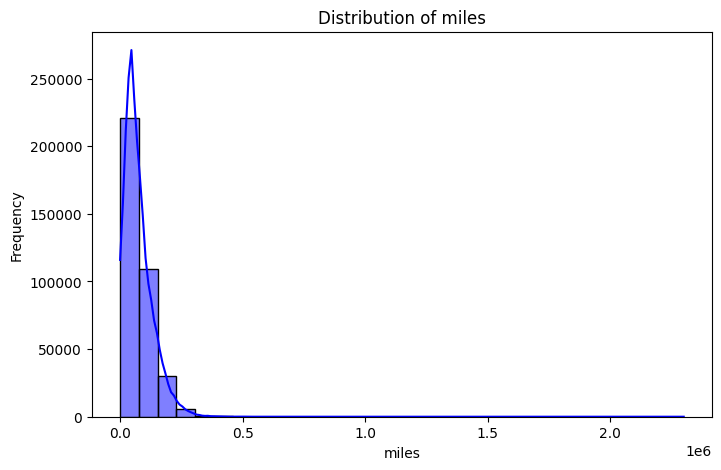

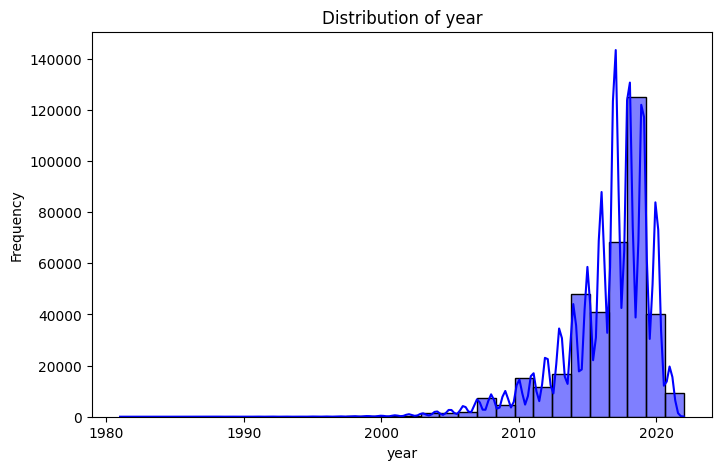

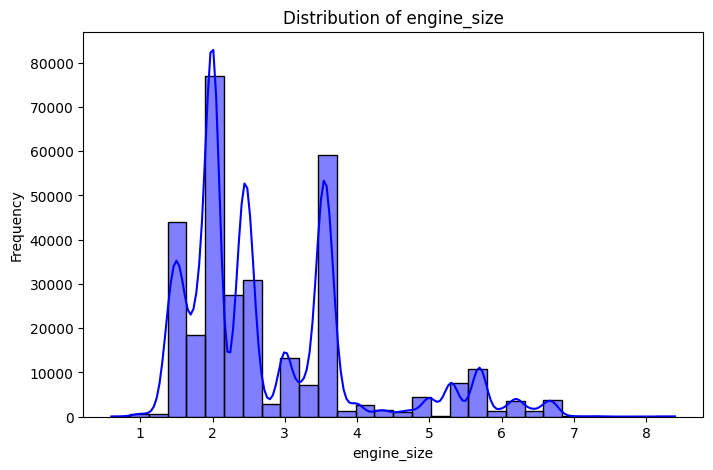

In [10]:
# Visualize numerical attributes
for col in numerical_attributes:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cars[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


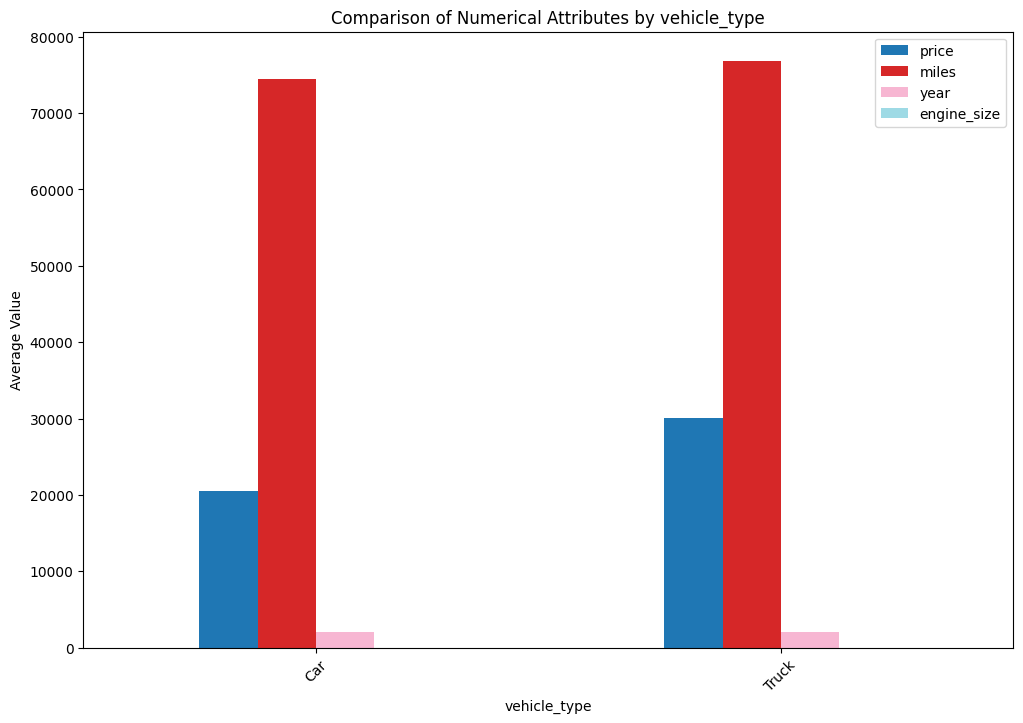

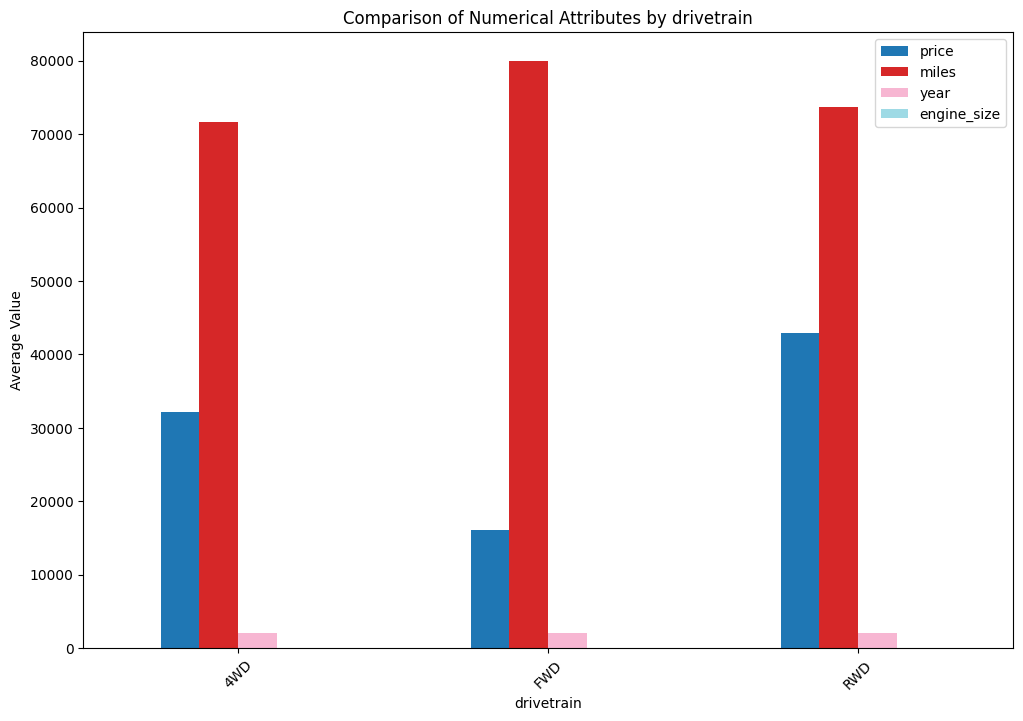

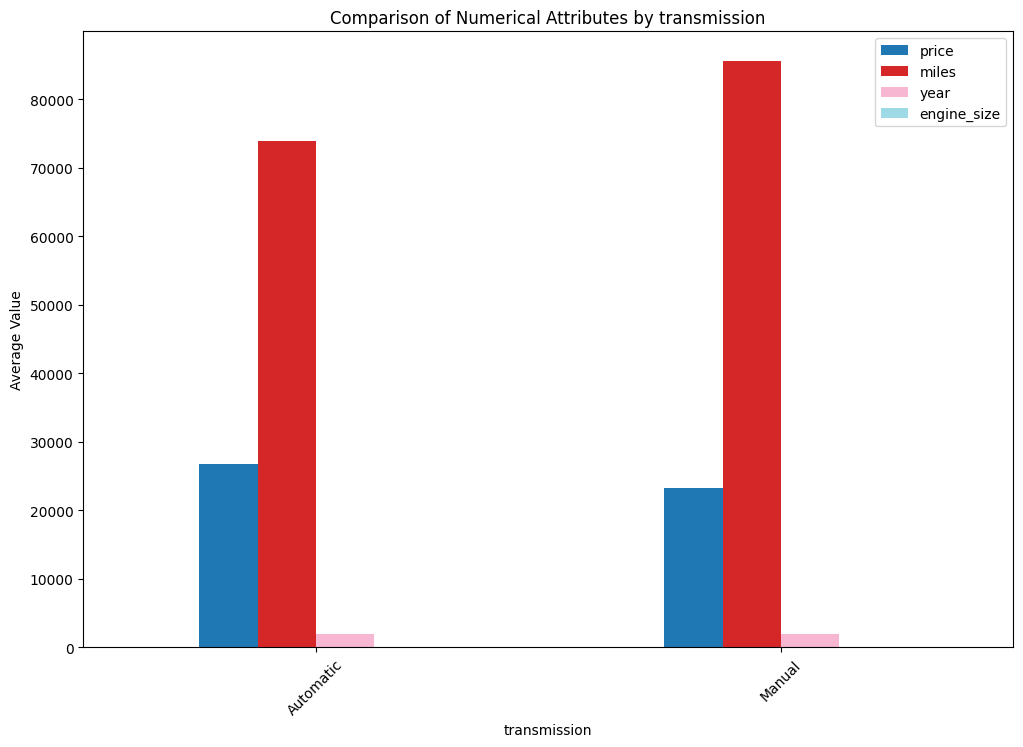

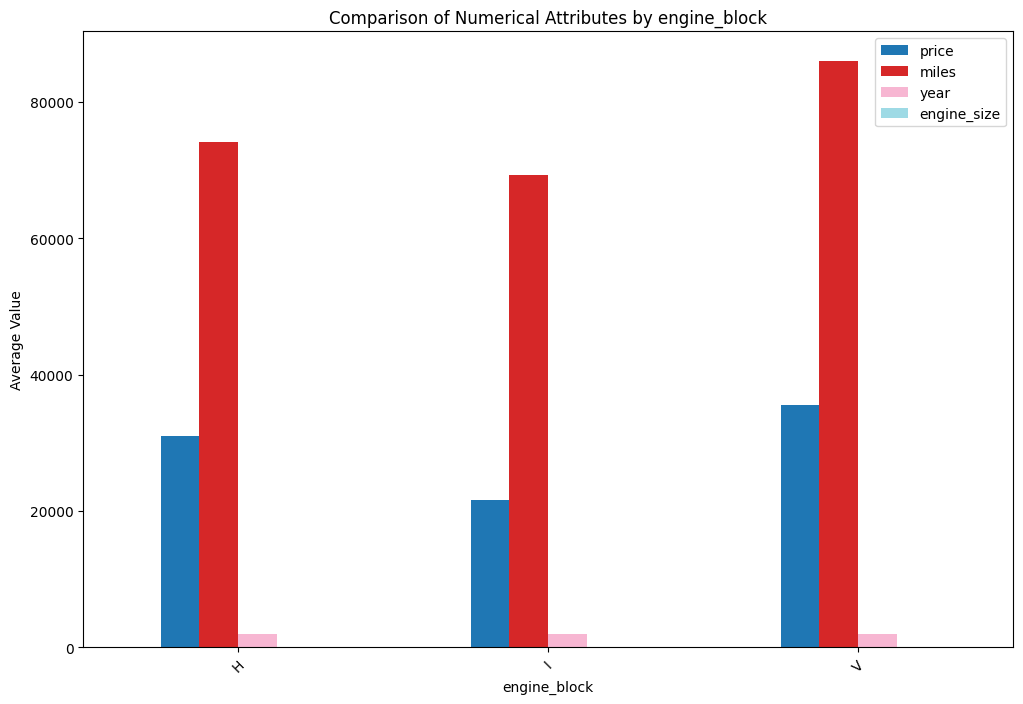

In [11]:
# Visualize categorical attributes
categorical_attributes = df_cars.select_dtypes(include=['object']).columns
numerical_attributes = df_cars.select_dtypes(include=['int64', 'float64']).columns

for cat_col in categorical_attributes:
    if len(df_cars[cat_col].unique()) <= 10:  # Restrict to smaller categories
        aggregated_data = df_cars.groupby(cat_col)[numerical_attributes].mean()
        aggregated_data.plot(kind='bar', figsize=(12, 8), colormap='tab20')
        plt.title(f'Comparison of Numerical Attributes by {cat_col}')
        plt.ylabel('Average Value')
        plt.xlabel(cat_col)
        plt.xticks(rotation=45)
        plt.show()



For Category Proportions view of raw data

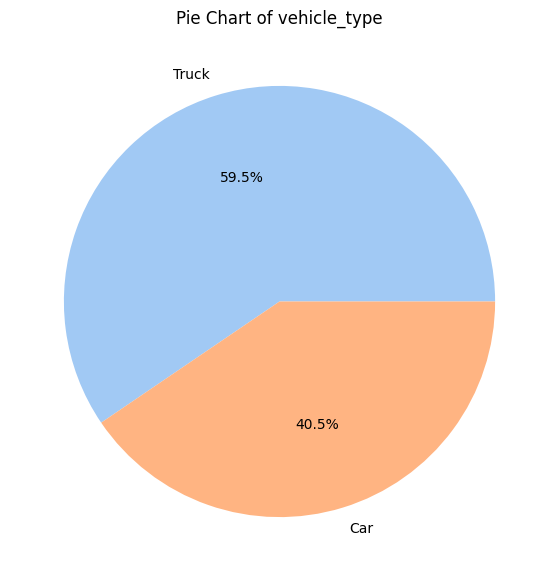

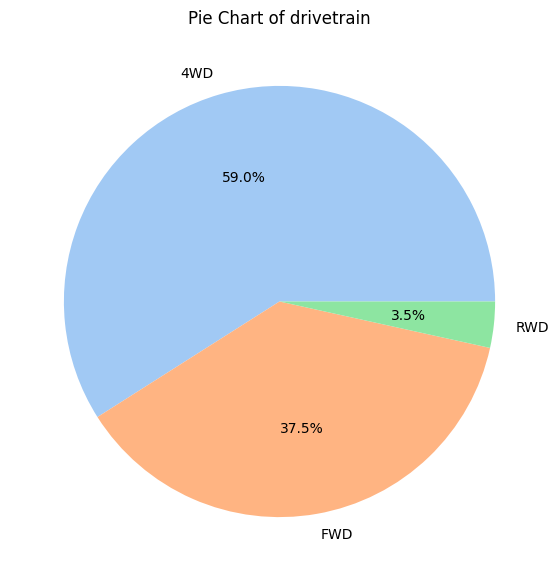

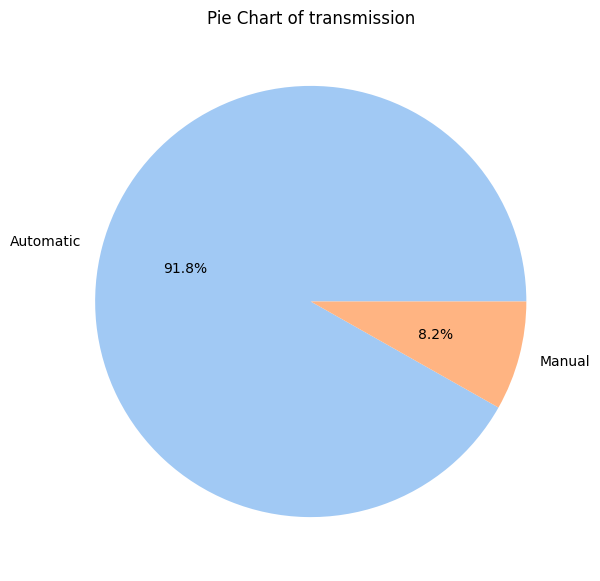

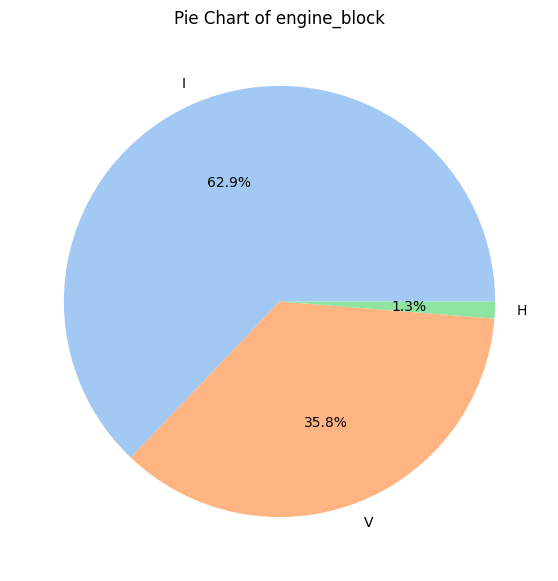

In [12]:
for col in categorical_attributes:
    if df_cars[col].nunique() <= 10:  # Restricting to small categories
        plt.figure(figsize=(7, 7))
        df_cars[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
        plt.show()


# Data Cleaning

The aim of my project is to predict the price of the cars based on miles,
year,
make,
model,
fuel_type,
engine_size,
body_type. So im dropping all the other unnecessory columns.

In [13]:
# List of columns to drop
columns_to_drop = ['id', 'vin', 'stock_no', 'street', 'seller_name', 'city', 'zip']

# Drop the columns and create a new DataFrame
df_cars_dp = df_cars.drop(columns=columns_to_drop)

# Display the updated DataFrame information
print(df_cars_dp.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393603 entries, 0 to 393602
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         358486 non-null  float64
 1   miles         366590 non-null  float64
 2   year          393586 non-null  float64
 3   make          393603 non-null  object 
 4   model         388809 non-null  object 
 5   trim          354824 non-null  object 
 6   body_type     359578 non-null  object 
 7   vehicle_type  355365 non-null  object 
 8   drivetrain    354608 non-null  object 
 9   transmission  357922 non-null  object 
 10  fuel_type     322790 non-null  object 
 11  engine_size   320950 non-null  float64
 12  engine_block  320439 non-null  object 
 13  state         385767 non-null  object 
dtypes: float64(4), object(10)
memory usage: 42.0+ MB
None


In [14]:
df_cars_dp.head(5)

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
0,179999.0,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,NB
1,179995.0,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,QC
2,168528.0,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,BC
3,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,ON
4,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,ON


In [15]:
# Check for missing values in the entire dataset
missing_summary = df_cars_dp.isnull().sum()

# Print columns with missing values and the count
print("Columns with Missing Values:")
print(missing_summary[missing_summary > 0])

# Get rows with missing values
rows_with_missing = df_cars_dp[df_cars_dp.isnull().any(axis=1)]

# Print the total number of rows with missing values and the data
print(f"\nNumber of Rows with Missing Values: {len(rows_with_missing)}")
print("\nRows with Missing Values:")
print(rows_with_missing)


Columns with Missing Values:
price           35117
miles           27013
year               17
model            4794
trim            38779
body_type       34025
vehicle_type    38238
drivetrain      38995
transmission    35681
fuel_type       70813
engine_size     72653
engine_block    73164
state            7836
dtype: int64

Number of Rows with Missing Values: 124051

Rows with Missing Values:
           price     miles    year           make            model      trim  \
15           NaN   12864.0  2017.0          Acura              NSX      Base   
21           NaN  239884.0  2008.0          Dodge          Avenger       SXT   
24       10995.0       NaN  2011.0       Chrysler              200         S   
31           NaN  125749.0  2012.0            RAM  Ram 1500 Pickup       SLT   
32           NaN  125749.0  2012.0            RAM  Ram 1500 Pickup       SLT   
...          ...       ...     ...            ...              ...       ...   
393516   21850.0  106816.0  2018.0       

In [16]:
# Drop rows with null values
df_cars_cl = df_cars_dp.dropna()

# Display the updated DataFrame information
print("DataFrame after dropping rows with null values:")
print(df_cars_cl.info())


DataFrame after dropping rows with null values:
<class 'pandas.core.frame.DataFrame'>
Index: 269552 entries, 0 to 393602
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         269552 non-null  float64
 1   miles         269552 non-null  float64
 2   year          269552 non-null  float64
 3   make          269552 non-null  object 
 4   model         269552 non-null  object 
 5   trim          269552 non-null  object 
 6   body_type     269552 non-null  object 
 7   vehicle_type  269552 non-null  object 
 8   drivetrain    269552 non-null  object 
 9   transmission  269552 non-null  object 
 10  fuel_type     269552 non-null  object 
 11  engine_size   269552 non-null  float64
 12  engine_block  269552 non-null  object 
 13  state         269552 non-null  object 
dtypes: float64(4), object(10)
memory usage: 30.8+ MB
None


In [17]:
df_cars_cl.shape

(269552, 14)

In [18]:
df_cars_cl.head(5)

,price,miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,fuel_type,engine_size,engine_block,state
0,179999.0,9966.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,NB
1,179995.0,5988.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,QC
2,168528.0,24242.0,2017.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,BC
3,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,ON
4,220000.0,6637.0,2020.0,Acura,NSX,Base,Coupe,Car,4WD,Automatic,Electric / Premium Unleaded,3.5,V,ON


check outliers

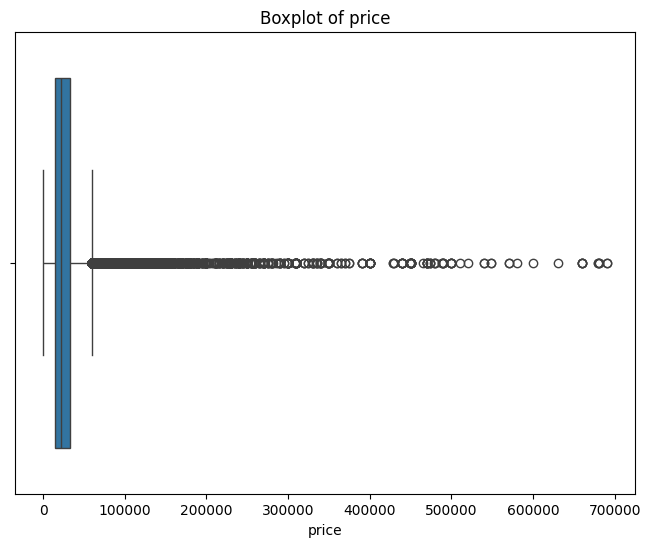

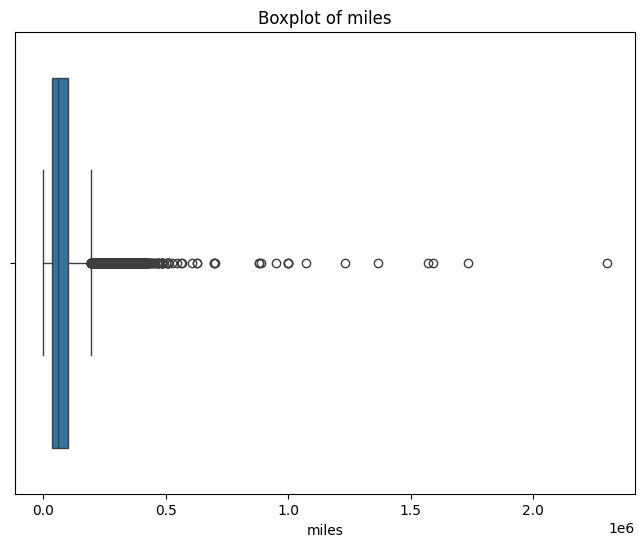

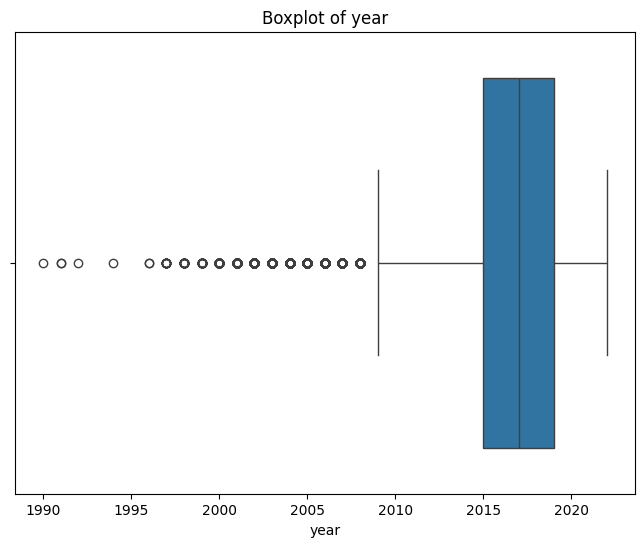

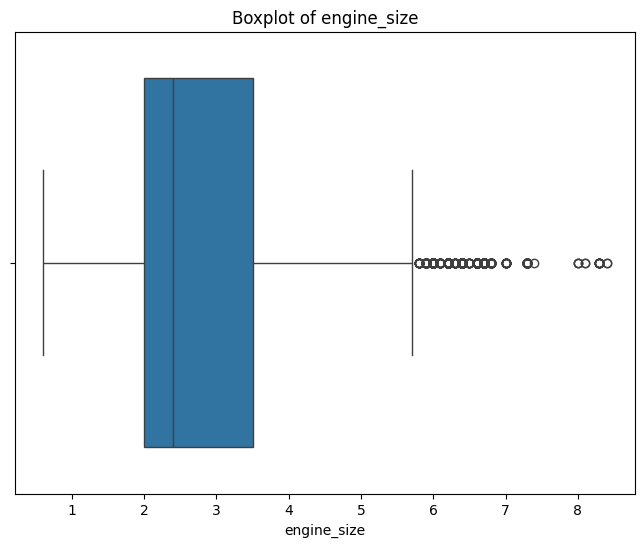

In [19]:

# Define numerical columns for outlier visualization
numerical_columns = ['price', 'miles', 'year', 'engine_size']

# Create a boxplot for each numerical column to visualize outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cars_cl, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


print the outliers

In [20]:
# Function to identify outliers using the IQR method
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify and print outliers for each numerical column in df_cars_cl
numerical_columns = ['price', 'miles', 'year', 'engine_size']
for col in numerical_columns:
    outliers = find_outliers(df_cars_cl, col)
    print(f"Outliers in '{col}':")
    print(outliers[[col]])  # Print only the column with outliers
    print(f"Total Outliers in '{col}': {len(outliers)}")
    print("-" * 40)



Outliers in 'price':
           price
0       179999.0
1       179995.0
2       168528.0
3       220000.0
4       220000.0
...          ...
393545   62988.0
393546   62988.0
393547  120790.0
393548   63995.0
393602  113530.0

[11132 rows x 1 columns]
Total Outliers in 'price': 11132
----------------------------------------
Outliers in 'miles':
           miles
19      252955.0
22      239884.0
23      254113.0
37      300096.0
42      330029.0
...          ...
393038  212000.0
393063  199509.0
393080  226617.0
393117  216350.0
393121  233902.0

[8857 rows x 1 columns]
Total Outliers in 'miles': 8857
----------------------------------------
Outliers in 'year':
          year
16      2008.0
17      2008.0
18      2008.0
19      2008.0
20      2008.0
...        ...
391153  2004.0
391154  2006.0
391683  2008.0
391689  2008.0
392769  2007.0

[6848 rows x 1 columns]
Total Outliers in 'year': 6848
----------------------------------------
Outliers in 'engine_size':
        engine_size
1447    

In [21]:
# Function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.60)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Create a copy of the original DataFrame to store the cleaned data
df_cars_cl_ot = df_cars_cl.copy()

# Remove outliers for each numerical column
numerical_columns = ['price', 'miles', 'year', 'engine_size']
for col in numerical_columns:
    df_cars_cl_ot = remove_outliers(df_cars_cl_ot, col)

# Display the shape of the new DataFrame after outlier removal
print(f"Shape of the DataFrame after outlier removal: {df_cars_cl_ot.shape}")


Shape of the DataFrame after outlier removal: (152940, 14)


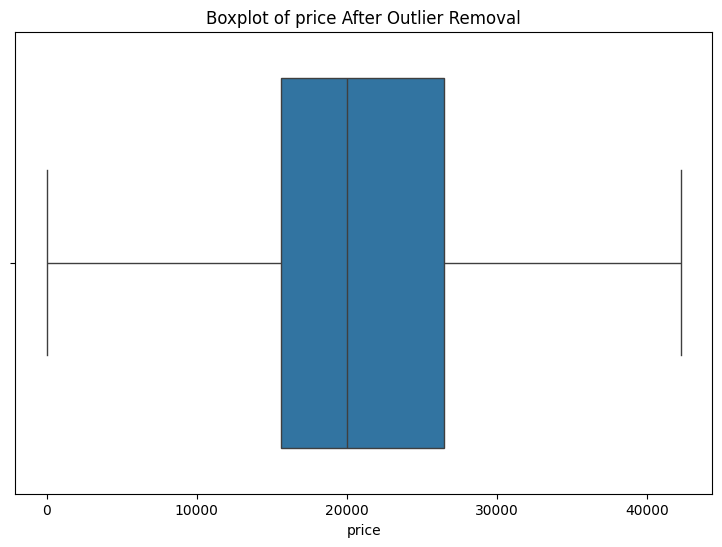

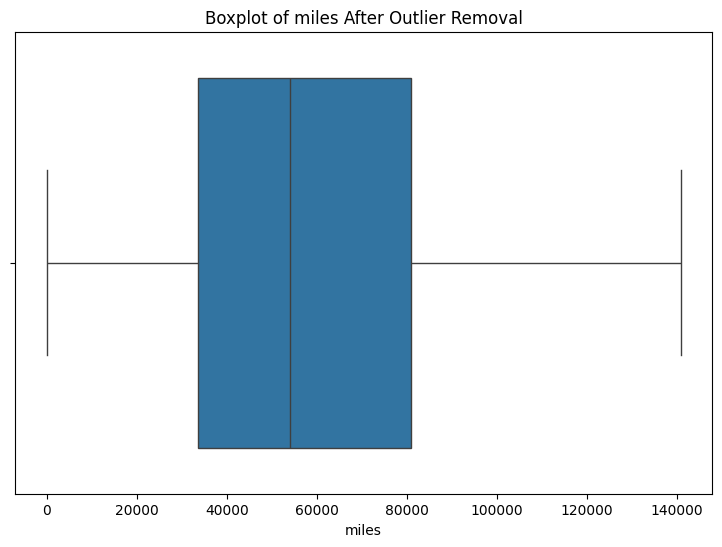

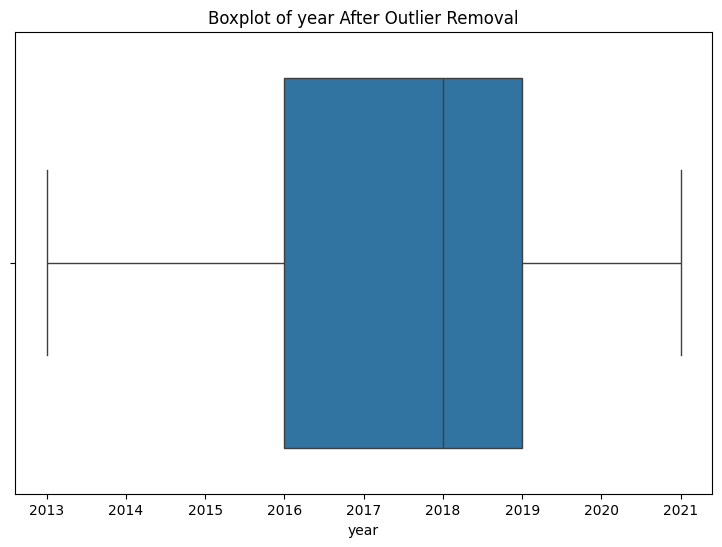

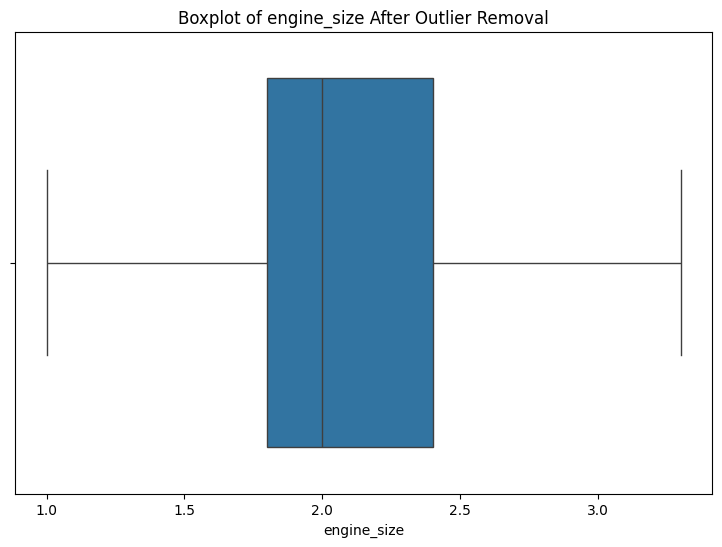

In [22]:
# Numerical columns to visualize
numerical_columns = ['price', 'miles', 'year', 'engine_size']

# Create a boxplot for each numerical column in the cleaned DataFrame
for col in numerical_columns:
    plt.figure(figsize=(9, 6))
    sns.boxplot(data=df_cars_cl_ot, x=col)
    plt.title(f'Boxplot of {col} After Outlier Removal')
    plt.xlabel(col)
    plt.show()

Correlation Analysis

Correlation of all attributes with 'price':
price           1.000000
year            0.536917
vehicle_type    0.400027
engine_size     0.260762
engine_block    0.167302
body_type       0.059176
trim            0.026203
model          -0.018138
make           -0.059256
state          -0.160425
transmission   -0.168418
fuel_type      -0.231125
miles          -0.458735
drivetrain     -0.567573
Name: price, dtype: float64


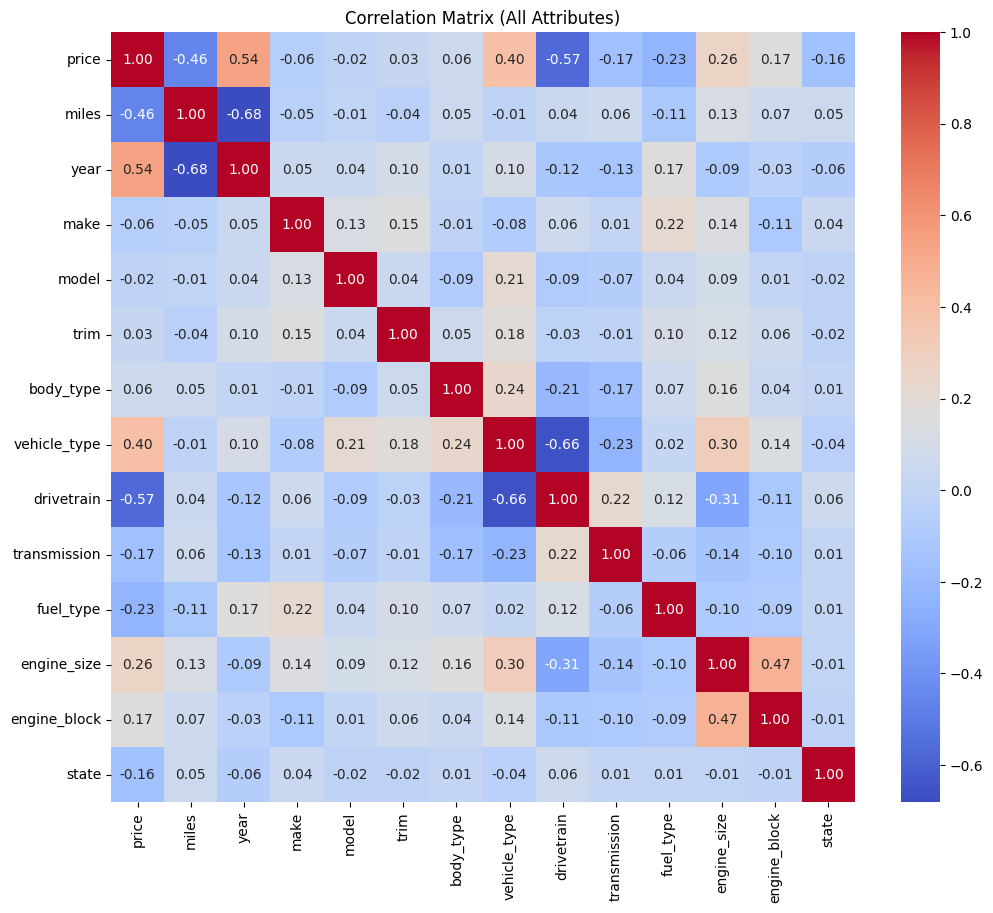

In [23]:
# Make a copy of the dataset for correlation analysis
correlation_df = df_cars_cl_ot.copy()

# Convert categorical columns to numeric using label encoding
categorical_columns = correlation_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    correlation_df[col] = correlation_df[col].astype('category').cat.codes

# Calculate the correlation matrix for all attributes
correlation_matrix = correlation_df.corr()

# Extract correlation values with the target attribute 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display correlation values
print("Correlation of all attributes with 'price':")
print(price_correlation)

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (All Attributes)")
plt.show()


# **Correlation Analysis of Vehicle Price**


**Strong Positive Correlation (Price Increases):**
Year (0.54):
Newer vehicles tend to have higher prices due to better technology, lower mileage, and newer features.

**Vehicle Type (0.40):**
Certain vehicle types, such as SUVs and luxury cars, are associated with higher prices.

**Engine Size (0.26):**
Vehicles with larger engines often command higher prices, as they may be linked to performance or specific market demand.

**Engine Block (0.17):**
The engine configuration shows a small but notable positive impact on vehicle pricing.

**Strong Negative Correlation (Price Decreases):**

**Drivetrain (-0.57):**
Specific drivetrain types, like front-wheel drive (FWD), may reduce the vehicle's appeal, thus lowering its price.

**Miles (-0.46):**
High mileage significantly decreases vehicle prices as it indicates greater wear and tear.

**Fuel Type (-0.23):**
Vehicles with certain fuel types, such as diesel or gas, tend to have slightly lower prices compared to alternatives.

**State (-0.16):**
The geographical location where the vehicle is sold can have a minor negative impact on pricing due to regional demand.

**Transmission (-0.17):**
Certain transmission types, such as manual, might reduce the price slightly in regions where they are less desirable.

**Weak or No Correlation:**

**Body Type (0.06):**
Minimal impact on price, as the body type does not strongly influence the overall value.

**Trim (0.03):**
A specific trim level shows negligible impact on the vehicle's pricing.

**Model (-0.02):**
Insignificant negative correlation with price, as it may vary more by brand.

**Make (-0.06):**
The brand of the vehicle has a weak negative relationship, likely depending on specific brand reputations or popularity.

In [24]:
# Rename the DataFrame
df_cars_cleaned = df_cars_cl_ot

# Display the DataFrame to ensure it's correctly renamed
print("Cleaned DataFrame:")
print(df_cars_cleaned.head())

# Display the shape of the cleaned DataFrame
print(f"Shape of the cleaned DataFrame: {df_cars_cleaned.shape}")


Cleaned DataFrame:
       price     miles    year       make model trim  body_type vehicle_type  \
749  13988.0  139000.0  2015.0  Chevrolet  Volt   LT  Hatchback          Car   
750  13988.0  139000.0  2015.0  Chevrolet  Volt   LT  Hatchback          Car   
751  13995.0   99186.0  2015.0  Chevrolet  Volt   LT  Hatchback          Car   
752  13995.0   99186.0  2015.0  Chevrolet  Volt   LT  Hatchback          Car   
754  11985.0  136500.0  2013.0  Chevrolet  Volt   LT  Hatchback          Car   

    drivetrain transmission                    fuel_type  engine_size  \
749        FWD    Automatic  Electric / Premium Unleaded          1.4   
750        FWD    Automatic  Electric / Premium Unleaded          1.4   
751        FWD    Automatic  Electric / Premium Unleaded          1.4   
752        FWD    Automatic  Electric / Premium Unleaded          1.4   
754        FWD    Automatic  Electric / Premium Unleaded          1.4   

    engine_block state  
749            I    QC  
750        

In [25]:
# Check statistical details for numerical attributes after cleaning
numerical_stats = df_cars_cleaned.describe()
# Display the results
print("Statistical Details for Numerical Attributes:")
print(numerical_stats)

Statistical Details for Numerical Attributes:
               price          miles           year    engine_size
count  152940.000000  152940.000000  152940.000000  152940.000000
mean    21374.235432   58679.881313    2017.420099       2.043527
std      7737.047394   32865.595788       1.785177       0.432881
min         0.000000       0.000000    2013.000000       1.000000
25%     15589.000000   33732.000000    2016.000000       1.800000
50%     19998.000000   54160.500000    2018.000000       2.000000
75%     26490.000000   80819.250000    2019.000000       2.400000
max     42250.000000  140811.000000    2021.000000       3.300000


Visualisation of cleaned dataset

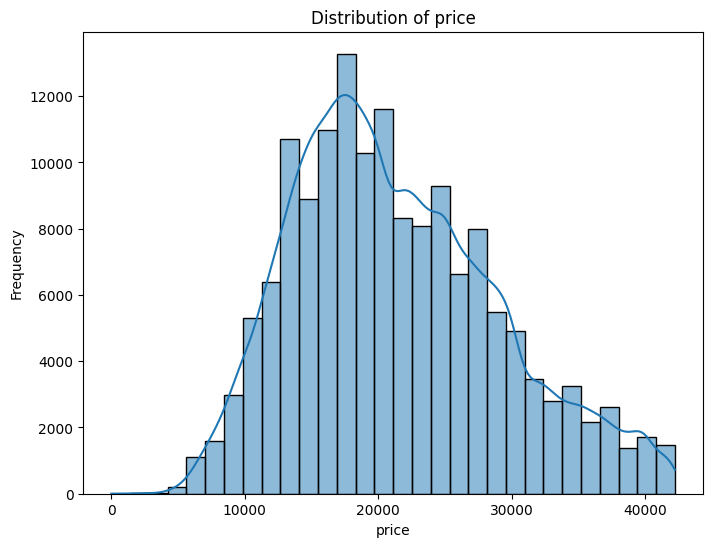

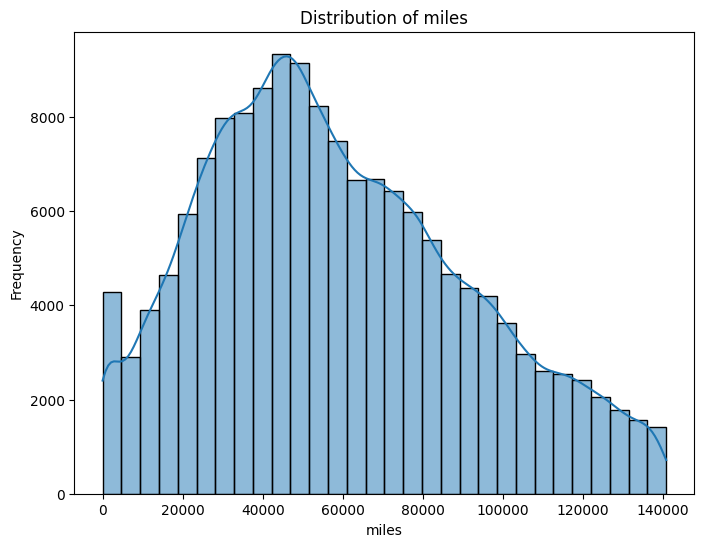

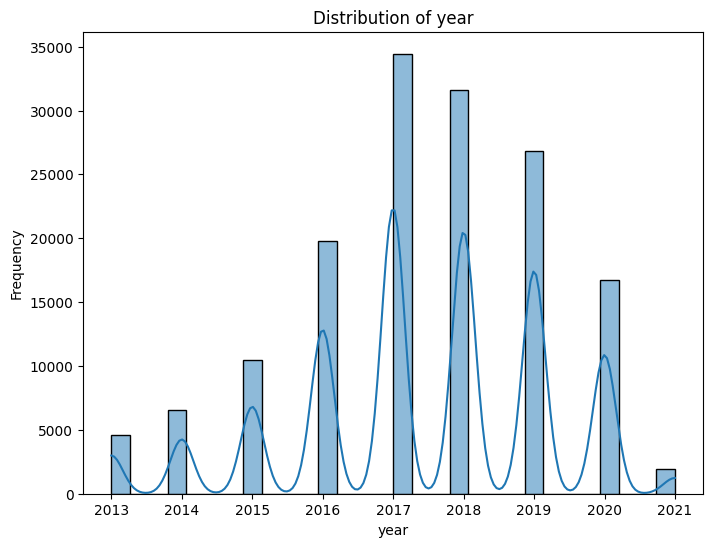

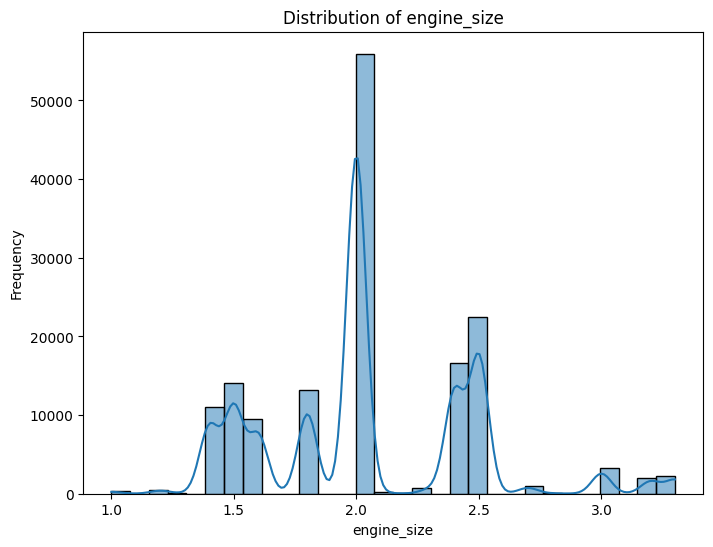

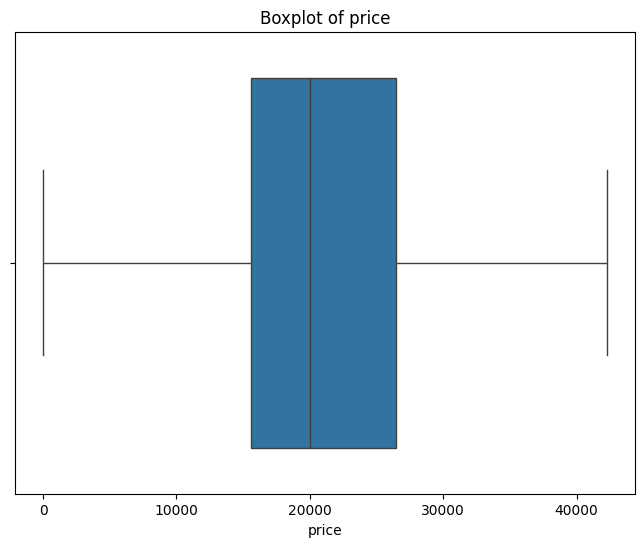

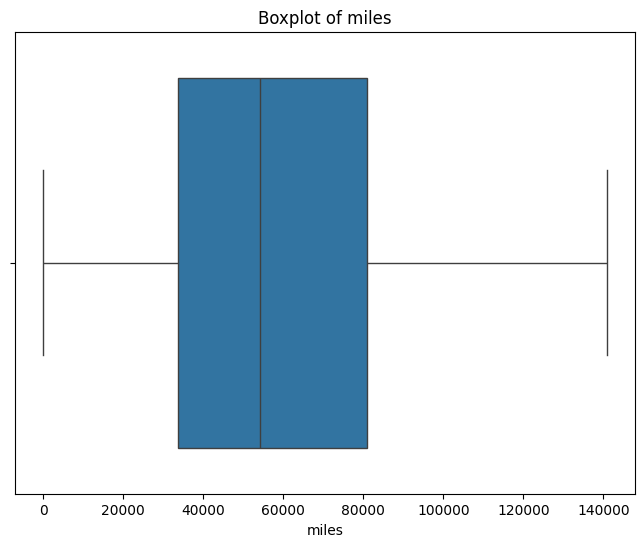

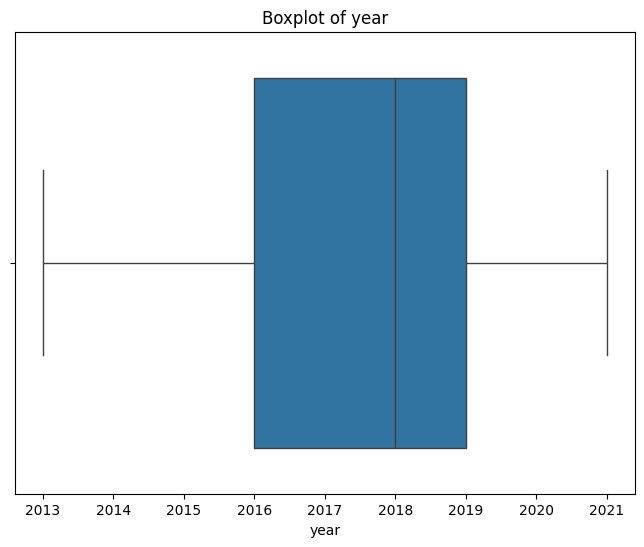

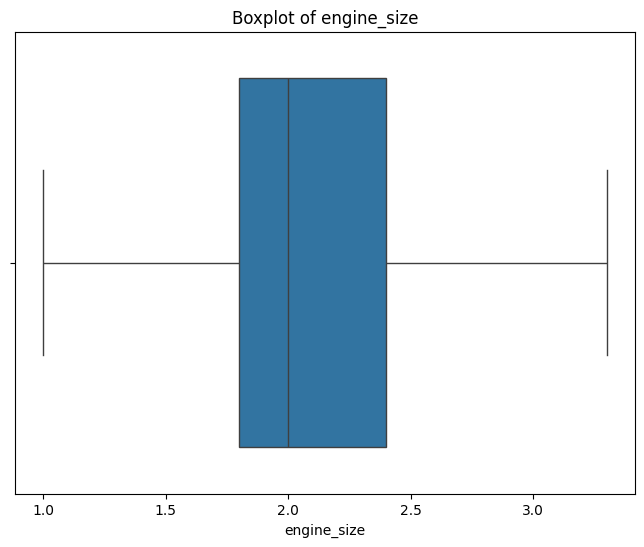

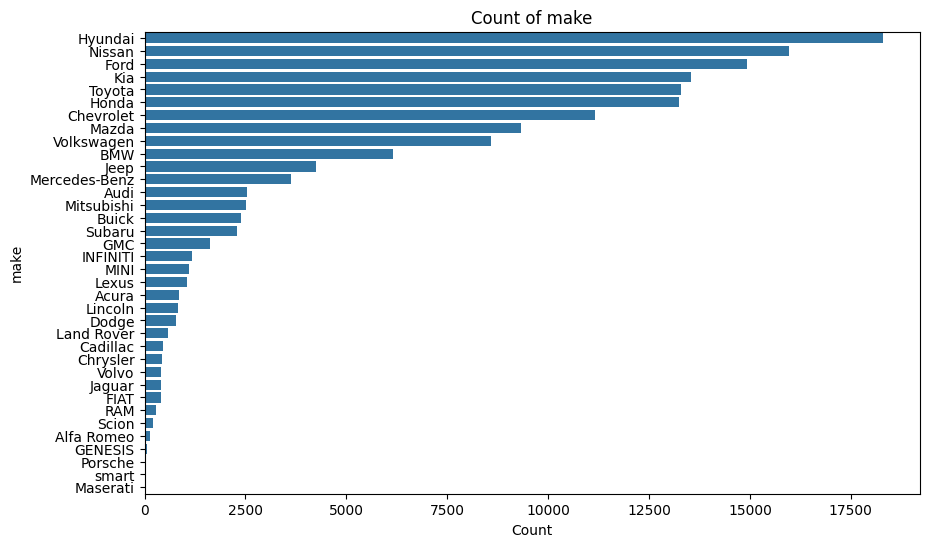

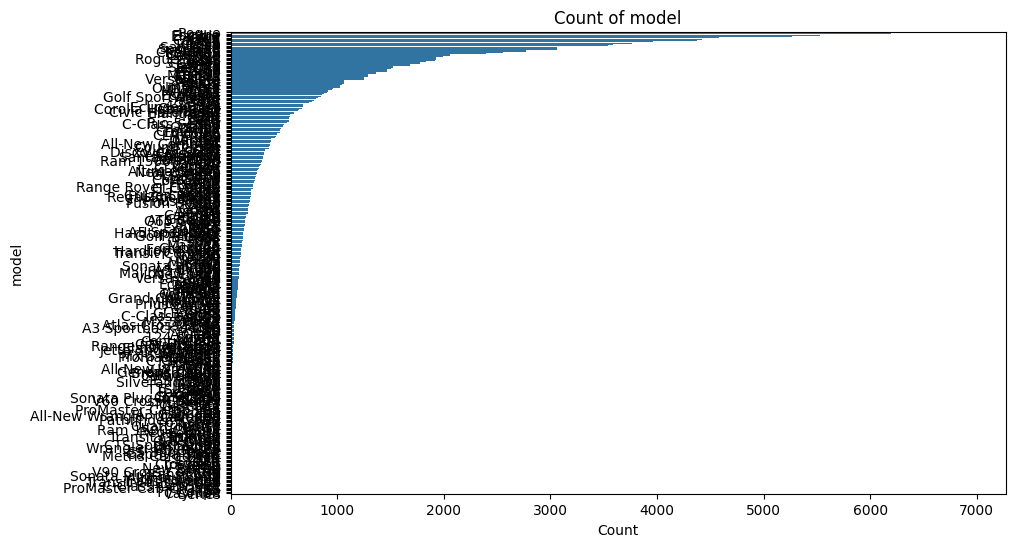

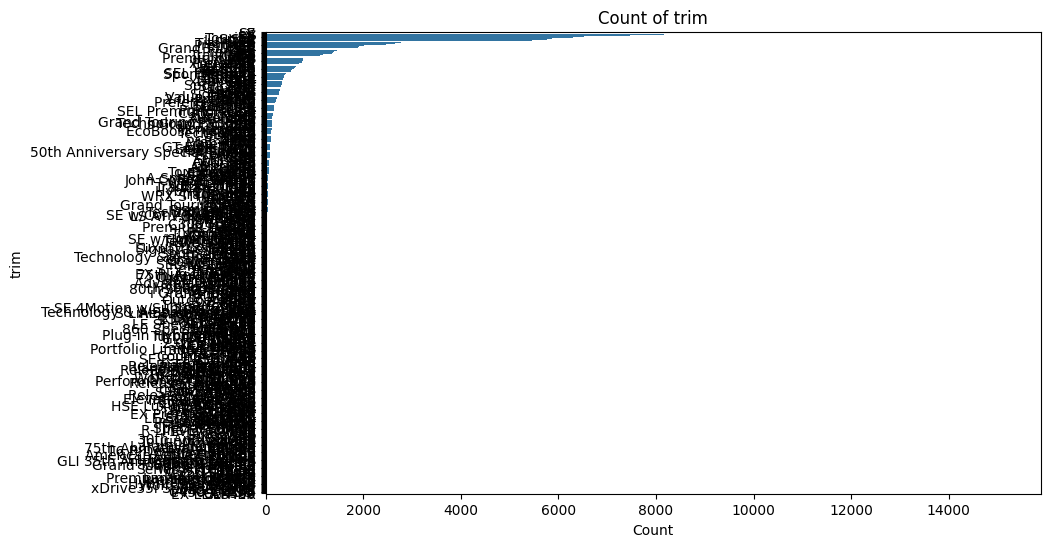

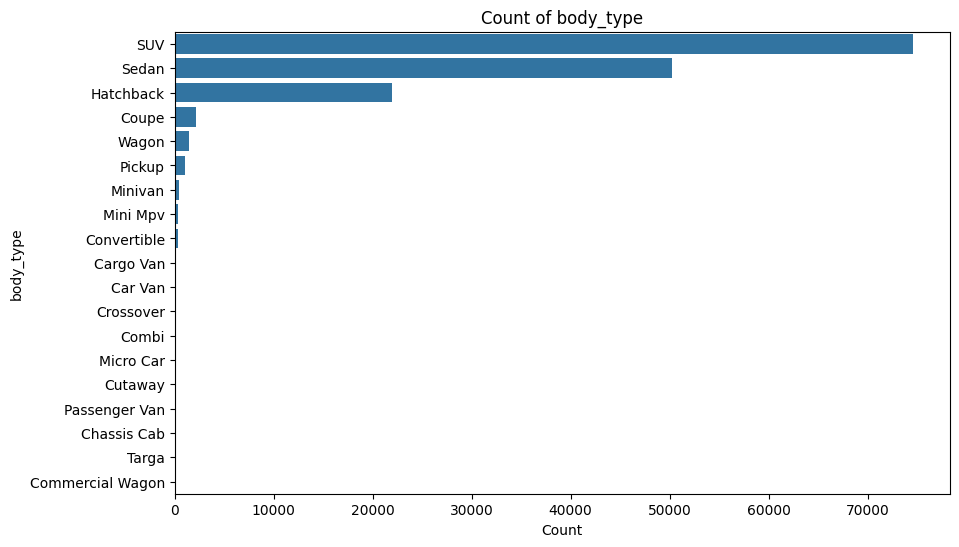

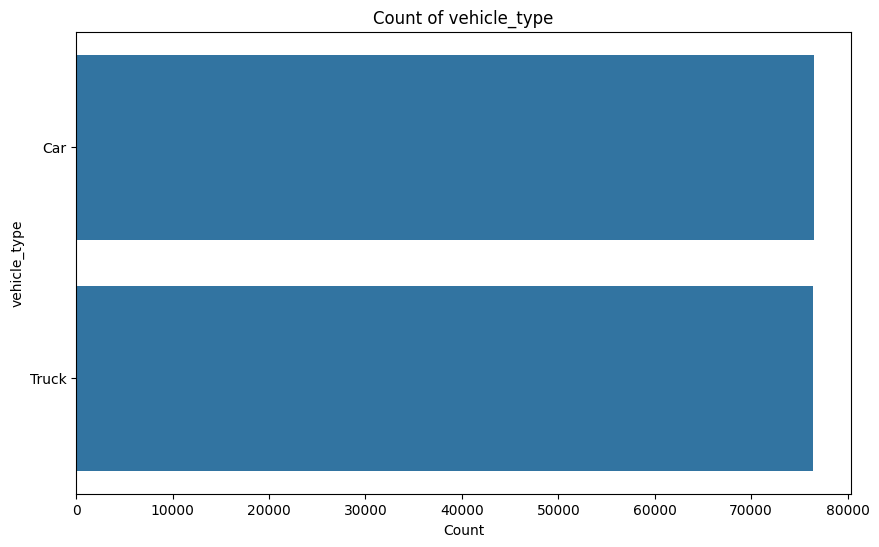

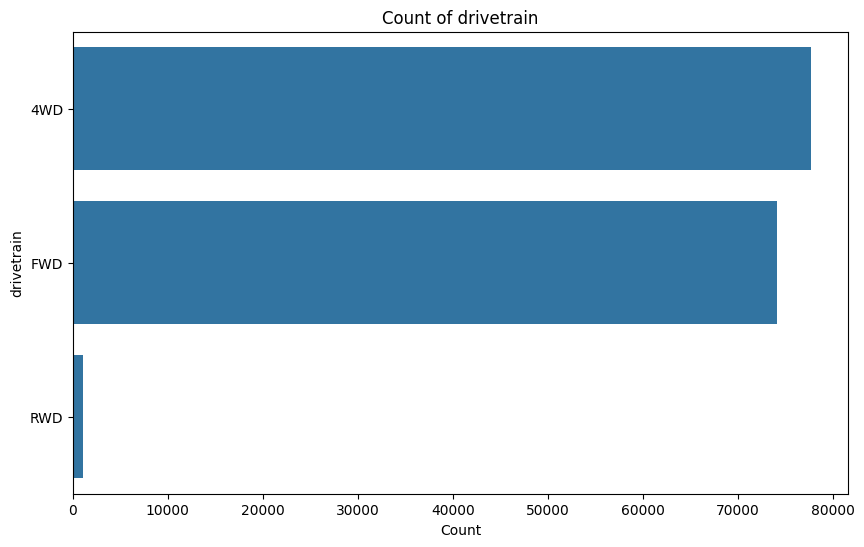

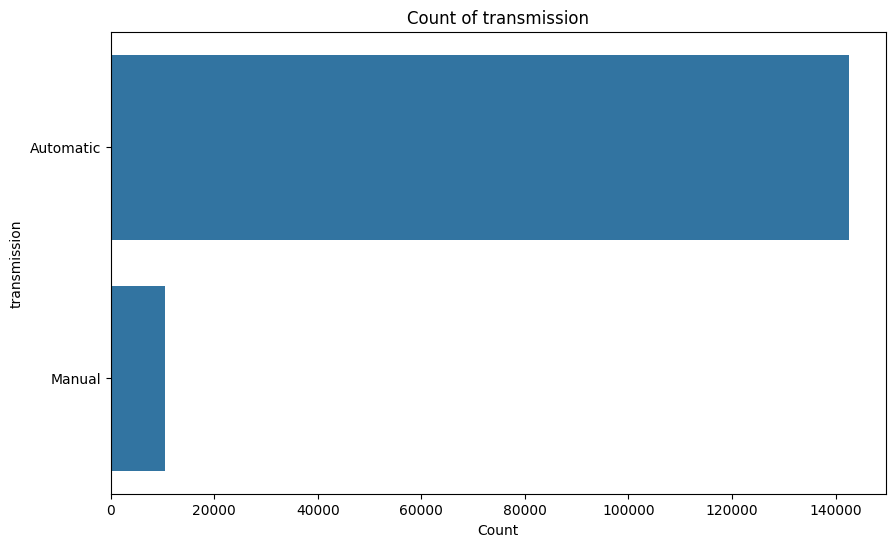

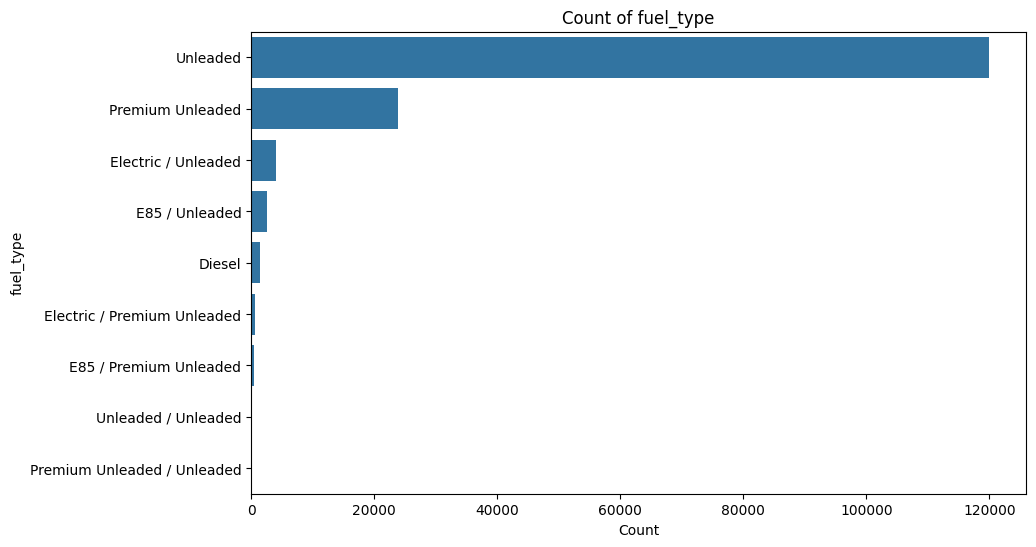

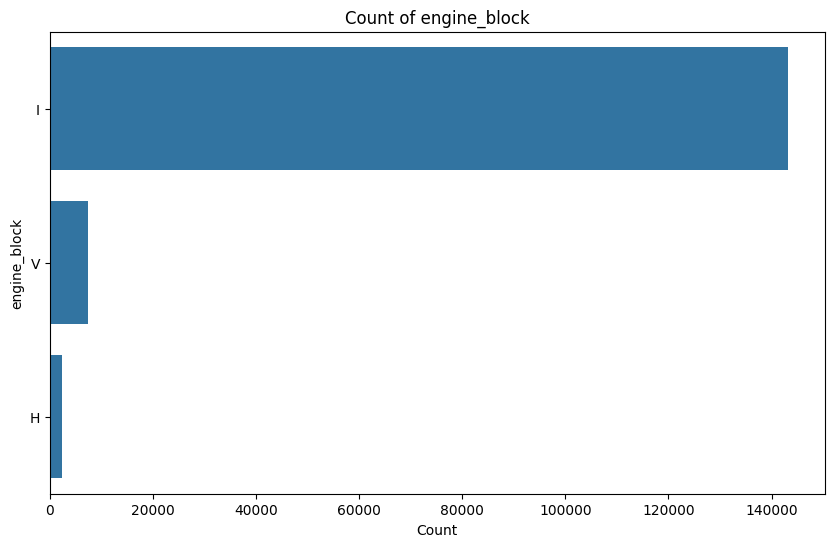

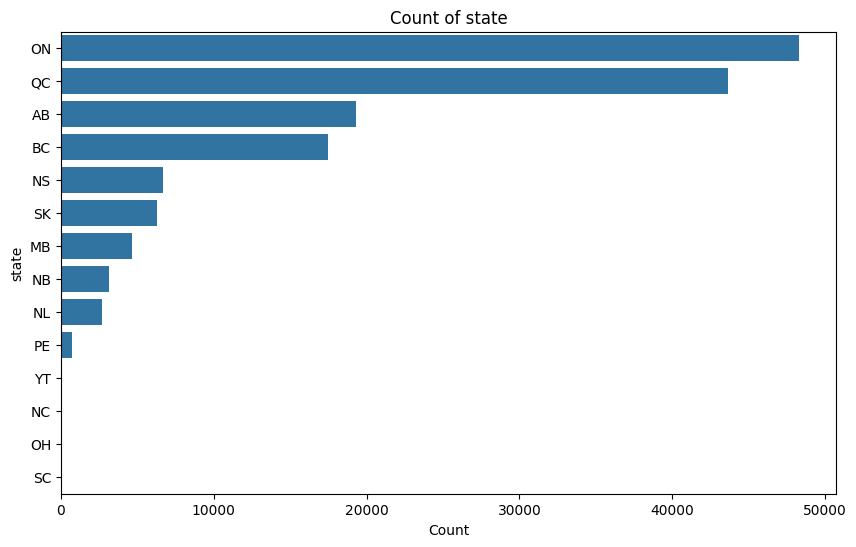

In [26]:
# Visualize numerical attributes with histograms
numerical_columns = df_cars_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cars_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize numerical attributes with boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cars_cleaned, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

# Visualize categorical attributes with bar plots
categorical_columns = df_cars_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cars_cleaned, y=col, order=df_cars_cleaned[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()


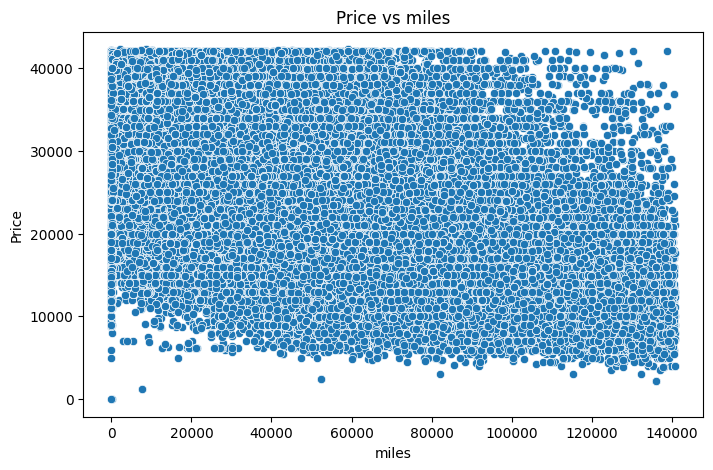

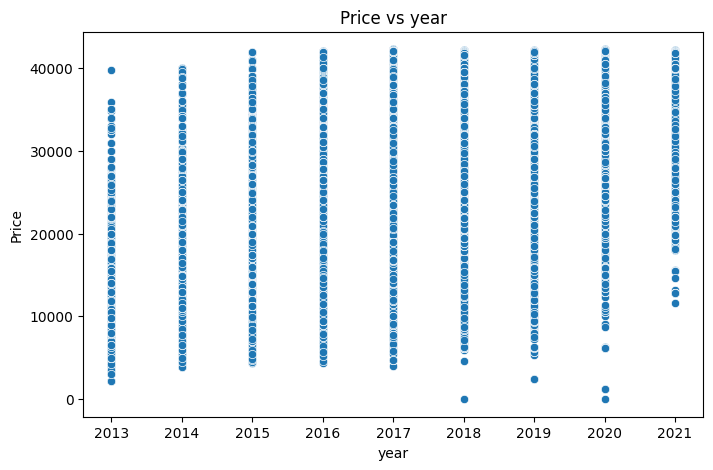

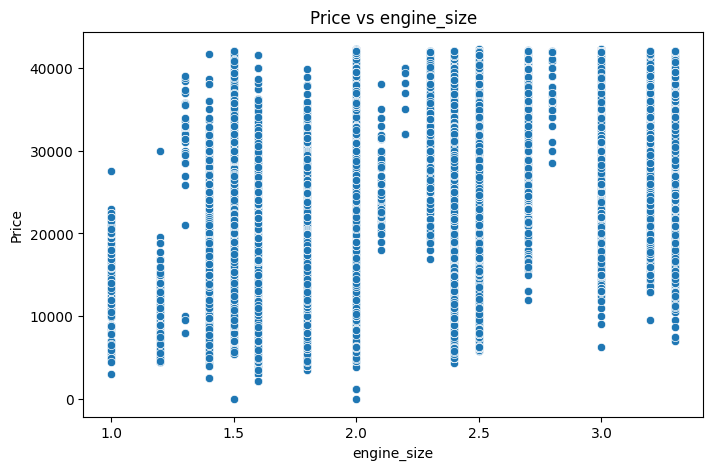

In [27]:
numerical_features = ['miles', 'year', 'engine_size']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_cars_cleaned, x=feature, y='price')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

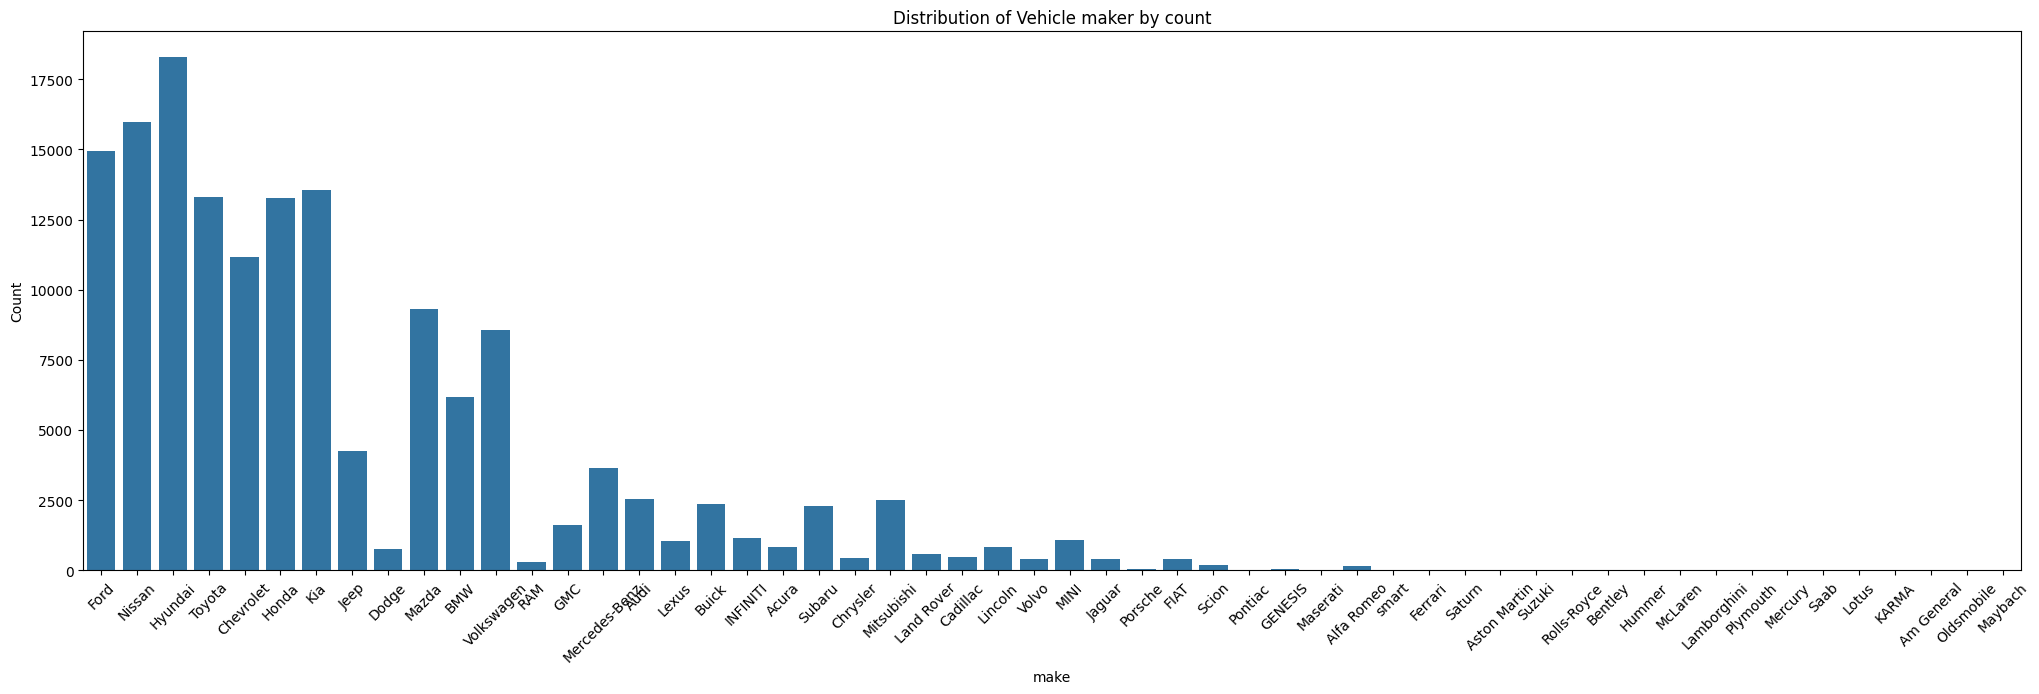

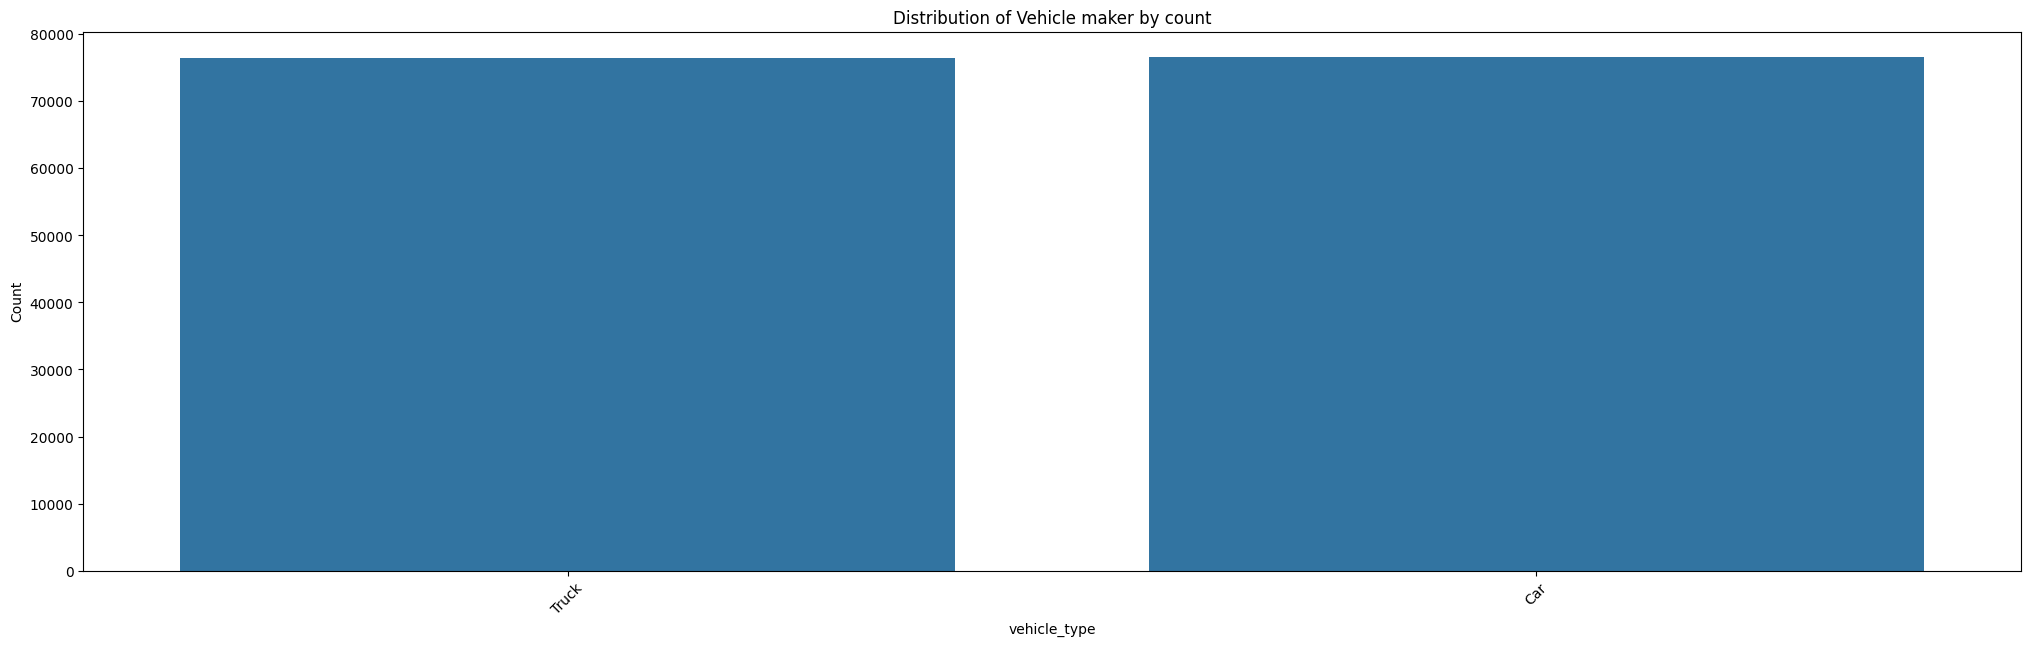

In [28]:
categorical_features = ['make', 'vehicle_type']

for feature in categorical_features:
    plt.figure(figsize=(25, 7))
    sns.countplot(data=df_cars_cleaned, x=feature, order=df_cars_cl[feature].value_counts().index)
    plt.title(f'Distribution of Vehicle maker by count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

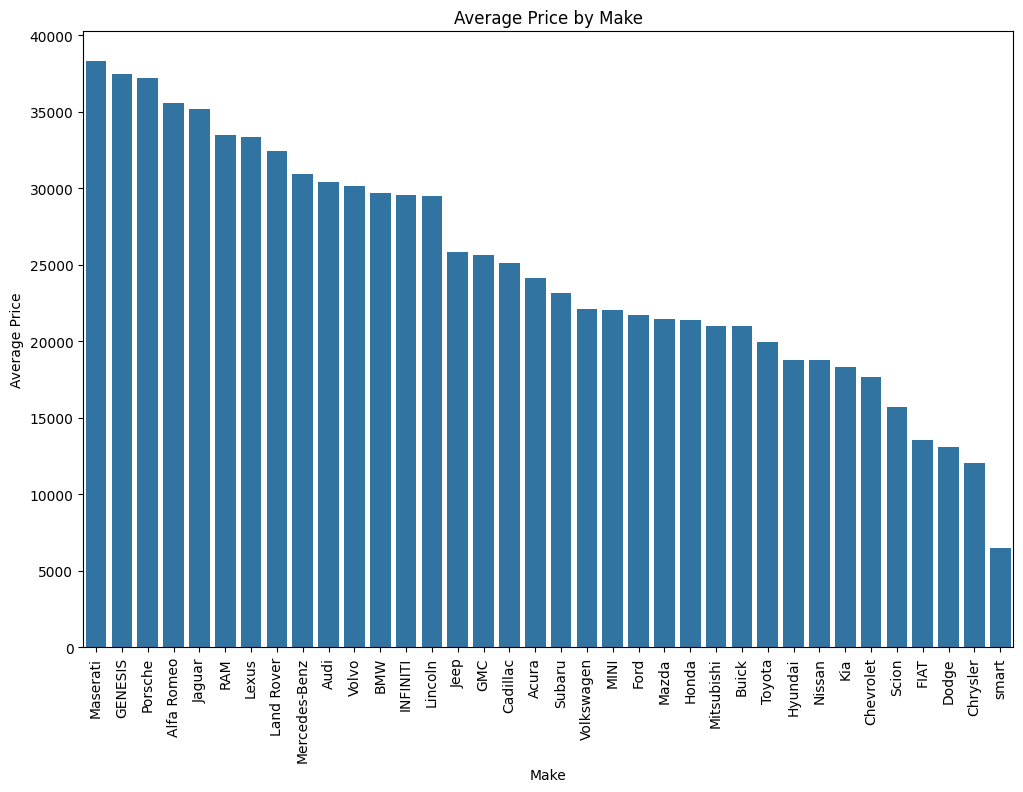

In [29]:
# Bar plot for average price by make
plt.figure(figsize=(12, 8))
avg_price_by_make = df_cars_cleaned.groupby('make')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values)
plt.title('Average Price by Make')
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


# **Linear Regression**

Encode Categorical Variables

In [30]:
# Step 1: Encode Categorical Variables
categorical_columns = ['make', 'model', 'trim', 'body_type', 'vehicle_type',
                       'drivetrain', 'transmission', 'fuel_type', 'engine_block', 'state']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cars_cleaned[col] = label_encoders[col].fit_transform(df_cars_cleaned[col])

Define Features (X) and Target (y)

In [31]:
# Define features (X) and target variable (y)
X = df_cars_cleaned[['miles', 'year', 'make', 'model', 'trim', 'body_type',
                     'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
                     'engine_size', 'engine_block', 'state']]
y = df_cars_cleaned['price']

Split the Data into Training and Testing Sets

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Initialize and Train the Linear Regression Model

In [33]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)



LinearRegression()

Evaluate the Model on the Training Set

In [34]:
# Predict on the training set
y_pred_train = linear_model.predict(X_train)

# Calculate performance metrics for training data
print("\nPerformance on Training Data:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
print("R² Score:", r2_score(y_train, y_pred_train))



Performance on Training Data:
Mean Absolute Error (MAE): 3286.1440944256465
Mean Squared Error (MSE): 19015743.496786404
R² Score: 0.682705060340208


Evaluate the Model on the Test Set

In [35]:
# Predict on the test set
y_pred_test = linear_model.predict(X_test)

# Calculate performance metrics for testing data
print("\nPerformance on Test Data:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_test))
print("R² Score:", r2_score(y_test, y_pred_test))


Performance on Test Data:
Mean Absolute Error (MAE): 3301.5413554544157
Mean Squared Error (MSE): 19269266.23715766
R² Score: 0.6765978879742361


 Visualize Actual vs Predicted Results

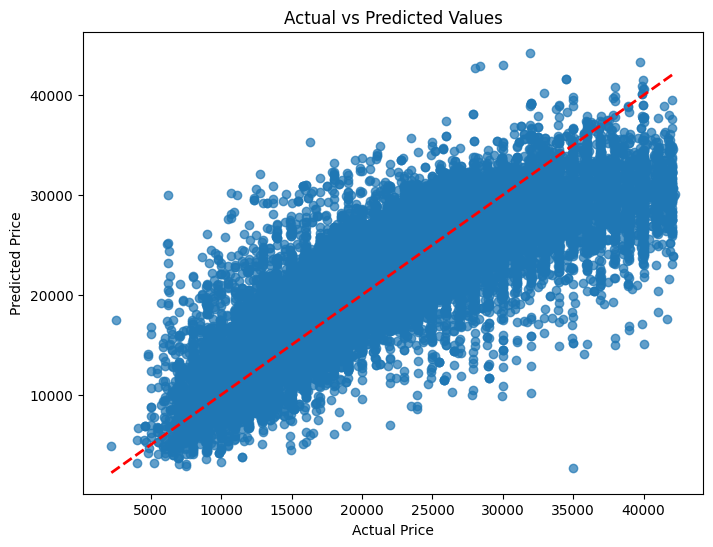

In [36]:
# Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()




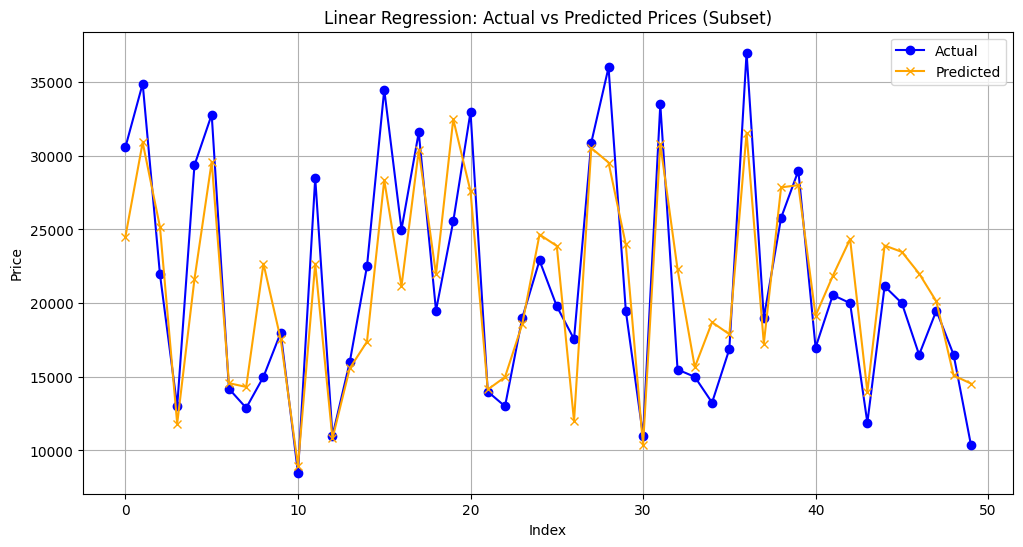

In [37]:
# Compare actual and predicted prices for a subset (Linear Regression)
subset = 50  # Number of points to visualize
plt.figure(figsize=(12, 6))
plt.plot(range(subset), y_test[:subset].reset_index(drop=True), label='Actual', marker='o', color='blue')
plt.plot(range(subset), y_pred_test[:subset], label='Predicted', marker='x', color='orange')
plt.title('Linear Regression: Actual vs Predicted Prices (Subset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Save the Linear Regression model
joblib.dump(linear_model, 'linear_regression_price_model.pkl')

print("Linear Regression model saved as 'linear_regression_price_model.pkl'")


Linear Regression model saved as 'linear_regression_price_model.pkl'


# **XGBoost**

I chose XGBoost due to its ability to handle complex relationships, high performance on tabular data, and robust ensemble-based approach. It effectively manages both numerical and categorical data, prevents overfitting with built-in regularization, and provides feature importance insights

 ** Preprocess the Data:**


In [39]:
# Copy the dataset
df_preprocessed = df_cars_cleaned.copy()


# Convert all object-type columns to categorical or encoded values
categorical_columns = ['miles', 'year', 'make', 'model', 'trim', 'body_type',
                     'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
                     'engine_size', 'engine_block', 'state']
for col in categorical_columns:
    df_preprocessed[col] = df_preprocessed[col].astype('category')


** Features and Target**

In [40]:
# Define features (X) and target (y)
X = df_preprocessed[['miles', 'year', 'make', 'model', 'trim', 'body_type',
                     'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
                     'engine_size', 'engine_block', 'state']]
y = df_preprocessed['price']

 **Split Data into Training and Testing Sets**

In [41]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train XGBoost Regressor**

In [42]:
# Initialize the XGBoost Regressor with categorical support
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6,
                         random_state=42, enable_categorical=True)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = xgb_model.predict(X_test)

# Predict on the training set
y_pred_train = xgb_model.predict(X_train)

# Evaluate the model on the training set
print("\nPerformance on Training Data:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
print("R² Score:", r2_score(y_train, y_pred_train))

# Evaluate the model on the test set
print("\nPerformance on Test Data:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_test))
print("R² Score:", r2_score(y_test, y_pred_test))




Performance on Training Data:
Mean Absolute Error (MAE): 1118.2271639800342
Mean Squared Error (MSE): 1952431.8840177238
R² Score: 0.9674219019133303

Performance on Test Data:
Mean Absolute Error (MAE): 1375.562909511019
Mean Squared Error (MSE): 3751790.8974768566
R² Score: 0.9370325218827831


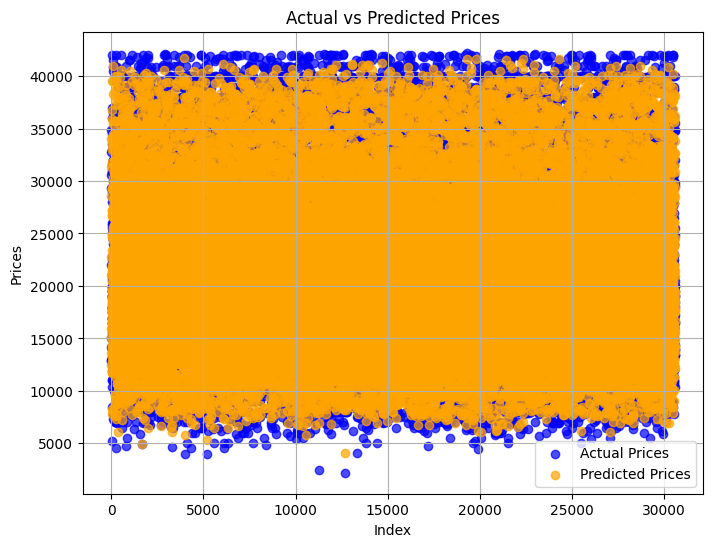

In [43]:
# Scatter plot for actual and predicted prices with different colors
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.7, label='Actual Prices')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='orange', alpha=0.7, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()




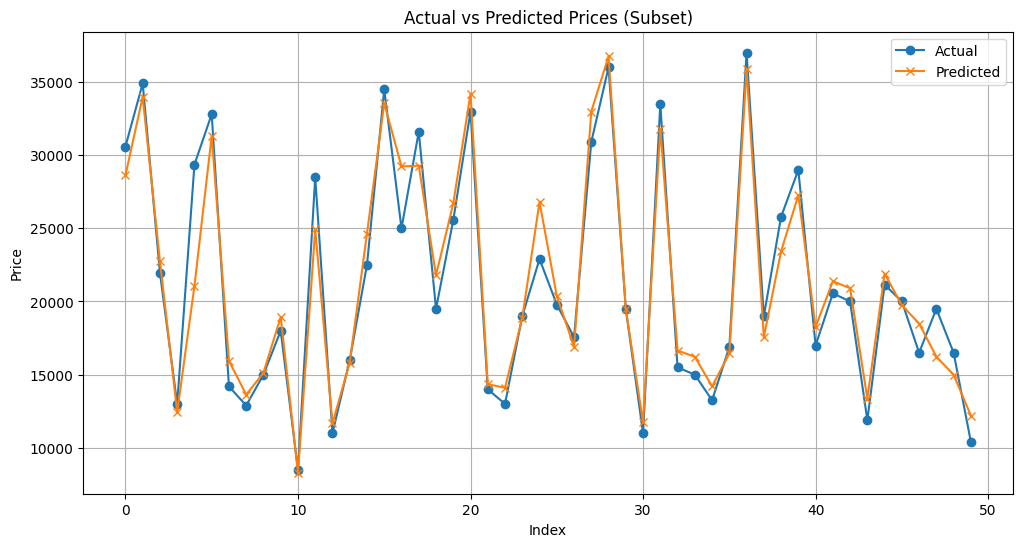

In [44]:
# Compare actual and predicted prices for a subset
subset = 50  # Number of points to visualize
plt.figure(figsize=(12, 6))
plt.plot(range(subset), y_test[:subset].values, label='Actual', marker='o')
plt.plot(range(subset), y_pred_test[:subset], label='Predicted', marker='x')
plt.title('Actual vs Predicted Prices (Subset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Save the XGBoost model
joblib.dump(xgb_model, 'xgboost_price_model.pkl')

print("XGBoost model saved as 'xgboost_price_model.pkl'")



XGBoost model saved as 'xgboost_price_model.pkl'


# **Neural Network Implementation**

 Encode Categorical Variables

In [46]:

categorical_columns = ['make', 'model', 'trim', 'body_type', 'vehicle_type',
                       'drivetrain', 'transmission', 'fuel_type', 'engine_block', 'state']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cars_cleaned[col] = label_encoders[col].fit_transform(df_cars_cleaned[col])

Define Features (X) and Target (y)

In [47]:

X = df_cars_cleaned[['miles', 'year', 'make', 'model', 'trim', 'body_type',
                     'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
                     'engine_size', 'engine_block', 'state']]
y = df_cars_cleaned['price']

 Split the Data into Training and Testing Sets

In [48]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Normalize the Features

In [49]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the Neural Network

In [50]:

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Train the Model

In [51]:

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 215323136.0000 - mean_absolute_error: 11389.0430 - val_loss: 18399724.0000 - val_mean_absolute_error: 3211.7385
Epoch 2/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 21923470.0000 - mean_absolute_error: 3527.6169 - val_loss: 15654534.0000 - val_mean_absolute_error: 2936.9685
Epoch 3/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 20103534.0000 - mean_absolute_error: 3367.8950 - val_loss: 14641947.0000 - val_mean_absolute_error: 2828.2507
Epoch 4/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 19061218.0000 - mean_absolute_error: 3281.5146 - val_loss: 14103629.0000 - val_mean_absolute_error: 2765.1721
Epoch 5/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 18556446.0000 - mean_absolute_error: 3235.1746 - val_loss: 13624043.0000 - val_mean_absolute_error: 2714.6897
Epoch 6/50
3824/3824 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 18122108.0000 - mean_absolute_error: 3210.5774 - val_loss: 13276712.0000

 Evaluate the Model

In [52]:
# Evaluate the model on training data
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
y_pred_train = model.predict(X_train).flatten()  # Predictions for training data
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate the model on testing data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred_test = model.predict(X_test).flatten()  # Predictions for testing data
test_r2 = r2_score(y_test, y_pred_test)

# Print Performance Metrics
print("\nPerformance on Training Data:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_loss)
print("R² Score:", train_r2)

print("\nPerformance on Test Data:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_loss)
print("R² Score:", test_r2)


3824/3824 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
956/956 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Performance on Training Data:
Mean Absolute Error (MAE): 2287.186767578125
Mean Squared Error (MSE): 9993372.0
R² Score: 0.8332514018070644

Performance on Test Data:
Mean Absolute Error (MAE): 2310.781494140625
Mean Squared Error (MSE): 10224742.0
R² Score: 0.8283949914324282


Plot Training History

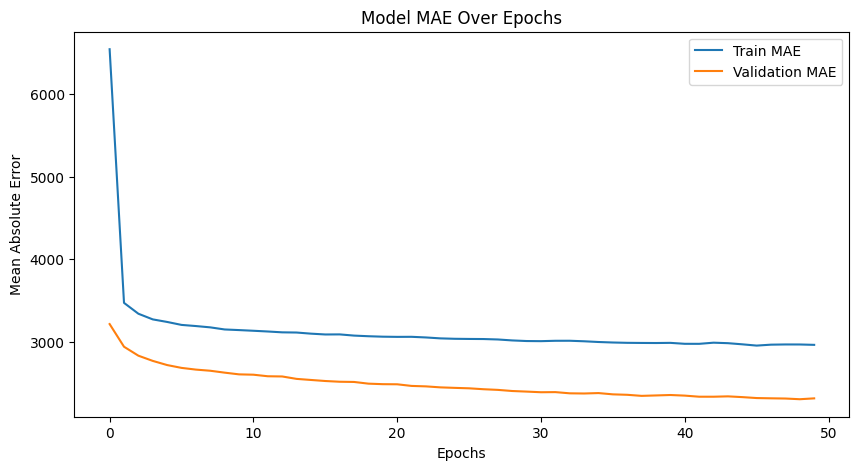

In [53]:


plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


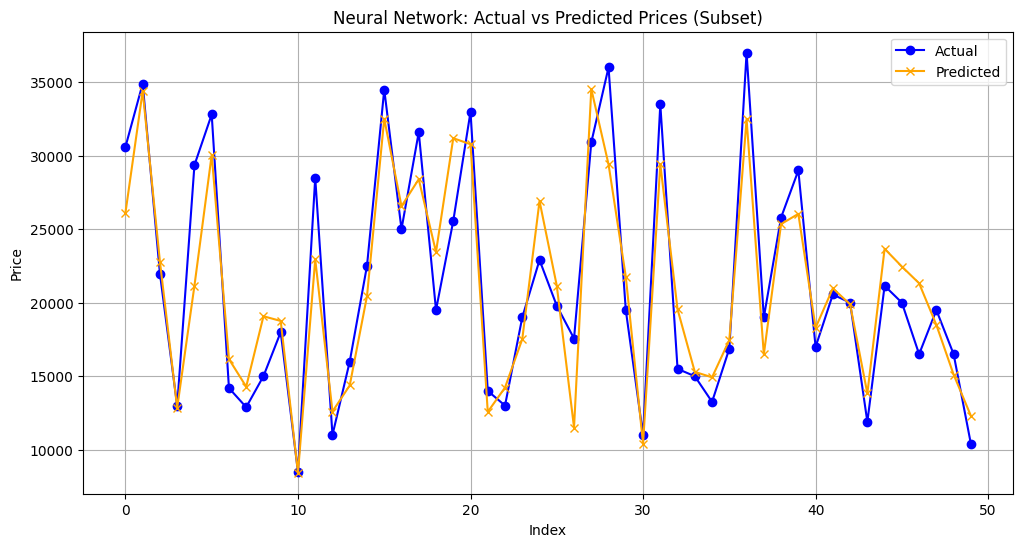

In [54]:
# Compare actual and predicted prices for a subset (Neural Network)
subset = 50  # Number of points to visualize
plt.figure(figsize=(12, 6))
plt.plot(range(subset), y_test[:subset].reset_index(drop=True), label='Actual', marker='o', color='blue')
plt.plot(range(subset), y_pred_test[:subset], label='Predicted', marker='x', color='orange')
plt.title('Neural Network: Actual vs Predicted Prices (Subset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
# Save the Neural Network model
save_model(model, 'neural_network_price_model.h5')

print("Neural Network model saved as 'neural_network_price_model.h5'")


Neural Network model saved as 'neural_network_price_model.h5'


# **Random Forest Implementation**

In [56]:
# Step 1: Encode Categorical Variables
categorical_columns = ['make', 'model', 'trim', 'body_type', 'vehicle_type',
                       'drivetrain', 'transmission', 'fuel_type', 'engine_block', 'state']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_cars_cleaned[col] = label_encoders[col].fit_transform(df_cars_cleaned[col])

In [57]:
# Step 2: Define Features (X) and Target (y)
X = df_cars_cleaned[['miles', 'year', 'make', 'model', 'trim', 'body_type',
                     'vehicle_type', 'drivetrain', 'transmission', 'fuel_type',
                     'engine_size', 'engine_block', 'state']]
y = df_cars_cleaned['price']

In [58]:
# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Step 4: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [60]:
# Step 5: Evaluate the Model
# Training set evaluation
y_pred_train = rf_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Test set evaluation
y_pred_test = rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print Performance Metrics
print("\nPerformance on Training Data:")
print("Mean Absolute Error (MAE):", train_mae)
print("Mean Squared Error (MSE):", train_mse)
print("R² Score:", train_r2)

print("\nPerformance on Test Data:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print("R² Score:", test_r2)



Performance on Training Data:
Mean Absolute Error (MAE): 336.2875177938451
Mean Squared Error (MSE): 508795.5656401695
R² Score: 0.9915102841849833

Performance on Test Data:
Mean Absolute Error (MAE): 850.494771623791
Mean Squared Error (MSE): 2493922.4830422634
R² Score: 0.95814372024768


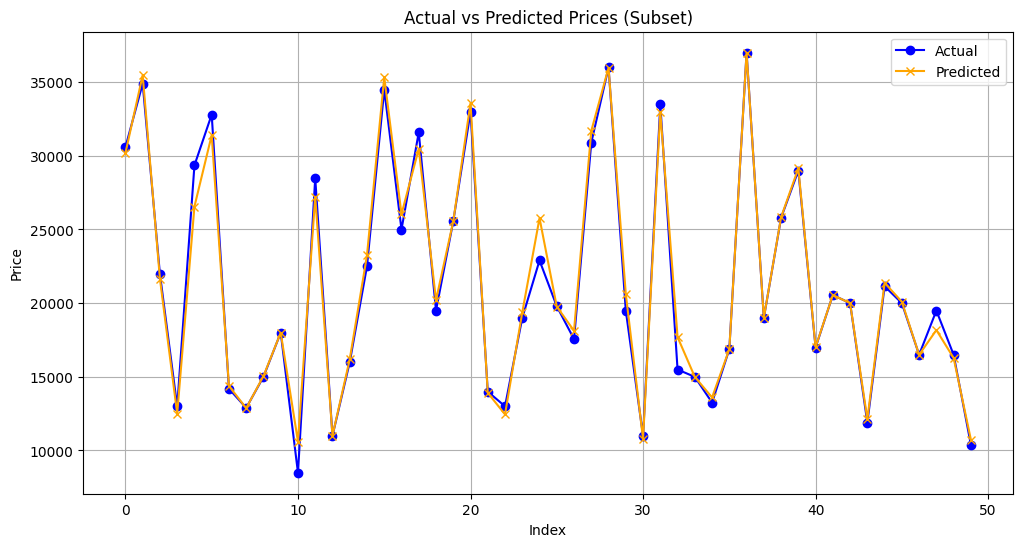

In [61]:
# Compare actual and predicted prices for a subset
subset = 50  # Number of points to visualize
plt.figure(figsize=(12, 6))
plt.plot(range(subset), y_test[:subset].reset_index(drop=True), label='Actual', marker='o', color='blue')
plt.plot(range(subset), y_pred_test[:subset], label='Predicted', marker='x', color='orange')
plt.title('Actual vs Predicted Prices (Subset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_price_model.pkl')

print("Random Forest model saved as 'random_forest_price_model.pkl'")


Random Forest model saved as 'random_forest_price_model.pkl'


# **Interactive Prediction System**

In [63]:
# Dictionaries for categorical options
year_options = ['2013.0', '2014.0', '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0']
make_options = ['Honda', 'Toyota', 'Ford', 'BMW', 'Audi', 'Chevrolet', 'Nissan']
trim_options = ['Base', 'Premium', 'Sport', 'Touring', 'Luxury']
body_type_options = ['Convertible', 'Coupe', 'Hatchback', 'Sedan', 'SUV', 'Truck', 'Wagon']
vehicle_type_options = ['Car', 'Truck']
drivetrain_options = ['4WD', 'FWD', 'RWD']
transmission_options = ['Automatic', 'Manual']
fuel_type_options = ['Diesel', 'Electric', 'Premium Unleaded', 'Unleaded']
engine_size_options = ['1.3', '1.5', '2.0', '2.5', '3.0', '3.5']
engine_block_options = ['H', 'I', 'V']
state_options = ['AB', 'BC', 'MB', 'NB', 'NC', 'NL', 'NS', 'OH', 'ON', 'PE', 'QC', 'SC', 'SK', 'YT']

# Mapping of car makes to their respective models
make_to_model_mapping = {
    'Honda': ['Civic', 'Accord', 'CR-V'],
    'Toyota': ['Corolla', 'Camry', 'RAV4'],
    'Ford': ['F-150', 'Escape', 'Explorer'],
    'BMW': ['3 Series', '5 Series', 'X5'],
    'Audi': ['A3', 'A4', 'Q5'],
    'Chevrolet': ['Malibu', 'Equinox', 'Silverado'],
    'Nissan': ['Altima', 'Sentra', 'Rogue']
}

# Encoding dictionaries for categorical variables
make_mapping = {make: idx for idx, make in enumerate(make_options)}
trim_mapping = {trim: idx for idx, trim in enumerate(trim_options)}
body_type_mapping = {body: idx for idx, body in enumerate(body_type_options)}
vehicle_type_mapping = {vt: idx for idx, vt in enumerate(vehicle_type_options)}
drivetrain_mapping = {dt: idx for idx, dt in enumerate(drivetrain_options)}
transmission_mapping = {trans: idx for idx, trans in enumerate(transmission_options)}
fuel_type_mapping = {fuel: idx for idx, fuel in enumerate(fuel_type_options)}
engine_block_mapping = {block: idx for idx, block in enumerate(engine_block_options)}
state_mapping = {state: idx for idx, state in enumerate(state_options)}

# Function to select the model
def select_model():
    print("\nAvailable Models:")
    print("1. Random Forest")
    print("2. Neural Network")
    print("3. XGBoost")
    print("4. Linear Regression")

    choice = int(input("Select the model (1-4): "))
    if choice == 1:
        model_path = 'random_forest_price_model.pkl'
    elif choice == 2:
        model_path = 'neural_network_price_model.h5'
    elif choice == 3:
        model_path = 'xgboost_price_model.pkl'
    elif choice == 4:
        model_path = 'linear_regression_price_model.pkl'
    else:
        print("Invalid choice! Please select a valid model.")
        return select_model()

    print(f"Loading model: {model_path}")
    if model_path.endswith('.h5'):
        return load_model(model_path)
    else:
        return joblib.load(model_path)

# Function to display options and get input
def choose_option(prompt, options):
    print(f"\n{prompt}")
    for i, option in enumerate(options):
        print(f"{i + 1}. {option}")
    choice = int(input("Choose an option (number): "))
    if 1 <= choice <= len(options):
        return options[choice - 1]
    else:
        print("Invalid choice! Please select a valid option.")
        return choose_option(prompt, options)

# Function to dynamically display models based on selected make
def get_model_for_make(make):
    models = make_to_model_mapping.get(make, [])
    if not models:
        print(f"No models found for the selected make: {make}.")
        return None
    return choose_option("Select Model:", models)

# Updated function to get inputs with dynamic model selection
def get_inputs():
    print("\nEnter the feature values:")
    miles = float(input("Miles Driven (2000-300000): "))
    year = choose_option("Select Year of Manufacture:", year_options)
    make = choose_option("Select Make (Brand):", make_options)
    model = get_model_for_make(make)  # Dynamically get models for the selected make
    if not model:
        print("Please restart and select a valid make.")
        return None
    trim = choose_option("Select Trim:", trim_options)
    body_type = choose_option("Select Body Type:", body_type_options)
    vehicle_type = choose_option("Select Vehicle Type:", vehicle_type_options)
    drivetrain = choose_option("Select Drivetrain:", drivetrain_options)
    transmission = choose_option("Select Transmission:", transmission_options)
    fuel_type = choose_option("Select Fuel Type:", fuel_type_options)
    engine_size = choose_option("Select Engine Size:", engine_size_options)
    engine_block = choose_option("Select Engine Block:", engine_block_options)
    state = choose_option("Select State:", state_options)

    # Combine all inputs into a list
    features = [[miles, year, make, model, trim, body_type, vehicle_type, drivetrain, transmission, fuel_type, engine_size, engine_block, state]]
    return features

# Function to encode features
def encode_features(inputs):
    miles, year, make, model, trim, body_type, vehicle_type, drivetrain, transmission, fuel_type, engine_size, engine_block, state = inputs[0]
    encoded_features = [
        float(miles),
        float(year),
        make_mapping[make],                # Encoded Make
        make_to_model_mapping[make].index(model),  # Encoded Model
        trim_mapping[trim],                # Encoded Trim
        body_type_mapping[body_type],      # Encoded Body Type
        vehicle_type_mapping[vehicle_type], # Encoded Vehicle Type
        drivetrain_mapping[drivetrain],    # Encoded Drivetrain
        transmission_mapping[transmission], # Encoded Transmission
        fuel_type_mapping[fuel_type],      # Encoded Fuel Type
        float(engine_size),                # Engine Size (numeric)
        engine_block_mapping[engine_block], # Encoded Engine Block
        state_mapping[state]               # Encoded State
    ]
    return [encoded_features]

# Function to predict the price
def predict_price(model, features):
    encoded_features = encode_features(features)
    if hasattr(model, 'predict'):
        prediction = model.predict(encoded_features)
    else:
        prediction = model.predict(encoded_features).flatten()
    return prediction[0]

# Main loop for model selection and prediction
if __name__ == "__main__":
    while True:
        model = select_model()
        inputs = get_inputs()
        if inputs is None:
            break
        try:
            predicted_price = predict_price(model, inputs)
            print(f"\nPredicted Price: ${predicted_price:,.2f}")
        except Exception as e:
            print(f"An error occurred during prediction: {e}")

        cont = input("\nDo you want to predict another price? (yes/no): ").strip().lower()
        if cont != 'yes':
            print("Goodbye!")
            break



Available Models:
1. Random Forest
2. Neural Network
3. XGBoost
4. Linear Regression
Select the model (1-4): 1
Loading model: random_forest_price_model.pkl

Enter the feature values:
Miles Driven (2000-300000): 90000

Select Year of Manufacture:
1. 2013.0
2. 2014.0
3. 2015.0
4. 2016.0
5. 2017.0
6. 2018.0
7. 2019.0
8. 2020.0
9. 2021.0
Choose an option (number): 4

Select Make (Brand):
1. Honda
2. Toyota
3. Ford
4. BMW
5. Audi
6. Chevrolet
7. Nissan
Choose an option (number): 2

Select Model:
1. Corolla
2. Camry
3. RAV4
Choose an option (number): 3

Select Trim:
1. Base
2. Premium
3. Sport
4. Touring
5. Luxury
Choose an option (number): 4

Select Body Type:
1. Convertible
2. Coupe
3. Hatchback
4. Sedan
5. SUV
6. Truck
7. Wagon
Choose an option (number): 4

Select Vehicle Type:
1. Car
2. Truck
Choose an option (number): 1

Select Drivetrain:
1. 4WD
2. FWD
3. RWD
Choose an option (number): 1

Select Transmission:
1. Automatic
2. Manual
Choose an option (number): 2

Select Fuel Type:
1. Di

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Predicted Price: $30,373.95

Do you want to predict another price? (yes/no): no
Goodbye!
